In [7]:
!pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
stockfile = pd.read_csv("C:/Users/ACER/Downloads/stockdata (2).csv",parse_dates=["Date"], index_col="Date")

In [37]:
stockfile['Date'] = pd.to_datetime(stockfile['Date'])


In [4]:
stockfile

,Open,High,Low,Close,Adj Close,Volume,Company
Date,,,,,,,
2021-01-04,120.315491,120.382408,117.629066,118.489487,104.750336,5417443,IBM
2021-01-05,119.512428,121.108986,119.130020,120.592735,106.609711,6395872,IBM
2021-01-06,121.319313,126.080307,121.147224,123.604210,109.271996,8322708,IBM
2021-01-07,124.321220,124.722755,122.619499,123.317398,109.018440,4714740,IBM
2021-01-08,122.915871,123.632889,121.395790,122.877632,108.629654,4891305,IBM
...,...,...,...,...,...,...,...
2021-12-23,332.750000,336.390015,332.730011,334.690002,330.033142,19617800,MSFT
2021-12-27,335.459991,342.480011,335.429993,342.450012,337.685150,19947000,MSFT
2021-12-28,343.149994,343.809998,340.320007,341.250000,336.501831,15661500,MSFT


In [5]:
stockfile.interpolate(method='time', inplace=True)

In [64]:

stockfile['close_diff'] = stockfile['Close'].diff()

# Calculate the on-balance volume
stockfile['cumulative_volume'] = stockfile['Volume'] * stockfile['close_diff'].apply(lambda x: 1 if x > 0 else -1).cumsum()

# Print the DataFrame with cumulative volume
print(stockfile[[ 'Volume', 'cumulative_volume']])




              Volume  cumulative_volume
Date                                   
2021-01-04   5417443           -5417443
2021-01-05   6395872                  0
2021-01-06   8322708            8322708
2021-01-07   4714740                  0
2021-01-08   4891305           -4891305
...              ...                ...
2021-12-23  19617800          431591600
2021-12-27  19947000          458781000
2021-12-28  15661500          344553000
2021-12-29  15042000          345966000
2021-12-30  15994500          351879000

[502 rows x 2 columns]


In [66]:
stockfile['typical_price'] = (stockfile['High']+stockfile['Low']+stockfile['Close'])/3
stockfile['cumulative_typical_price'] = stockfile['typical_price'].cumsum()
stockfile['VWAP'] = stockfile['cumulative_typical_price']*stockfile['Volume']/stockfile['cumulative_volume']

In [67]:
stockfile

,Open,High,Low,Close,Adj Close,Volume,Company,close_diff,cumulative_volume,typical_price,cumulative_typical_price,VWAP
Date,,,,,,,,,,,,
2021-01-04,120.315491,120.382408,117.629066,118.489487,104.750336,5417443,IBM,NaN,-5417443,118.833654,118.833654,-118.833654
2021-01-05,119.512428,121.108986,119.130020,120.592735,106.609711,6395872,IBM,2.103249,0,120.277247,239.110901,inf
2021-01-06,121.319313,126.080307,121.147224,123.604210,109.271996,8322708,IBM,3.011475,8322708,123.610580,362.721481,362.721481
2021-01-07,124.321220,124.722755,122.619499,123.317398,109.018440,4714740,IBM,-0.286812,0,123.553218,486.274699,inf
2021-01-08,122.915871,123.632889,121.395790,122.877632,108.629654,4891305,IBM,-0.439766,-4891305,122.635437,608.910136,-608.910136
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,332.750000,336.390015,332.730011,334.690002,330.033142,19617800,MSFT,1.489990,431591600,334.603343,100166.506930,4553.023042
2021-12-27,335.459991,342.480011,335.429993,342.450012,337.685150,19947000,MSFT,7.760010,458781000,340.120005,100506.626935,4369.853345
2021-12-28,343.149994,343.809998,340.320007,341.250000,336.501831,15661500,MSFT,-1.200012,344553000,341.793335,100848.420270,4584.019103


Text(0.5, 1.0, 'High v/s Low')

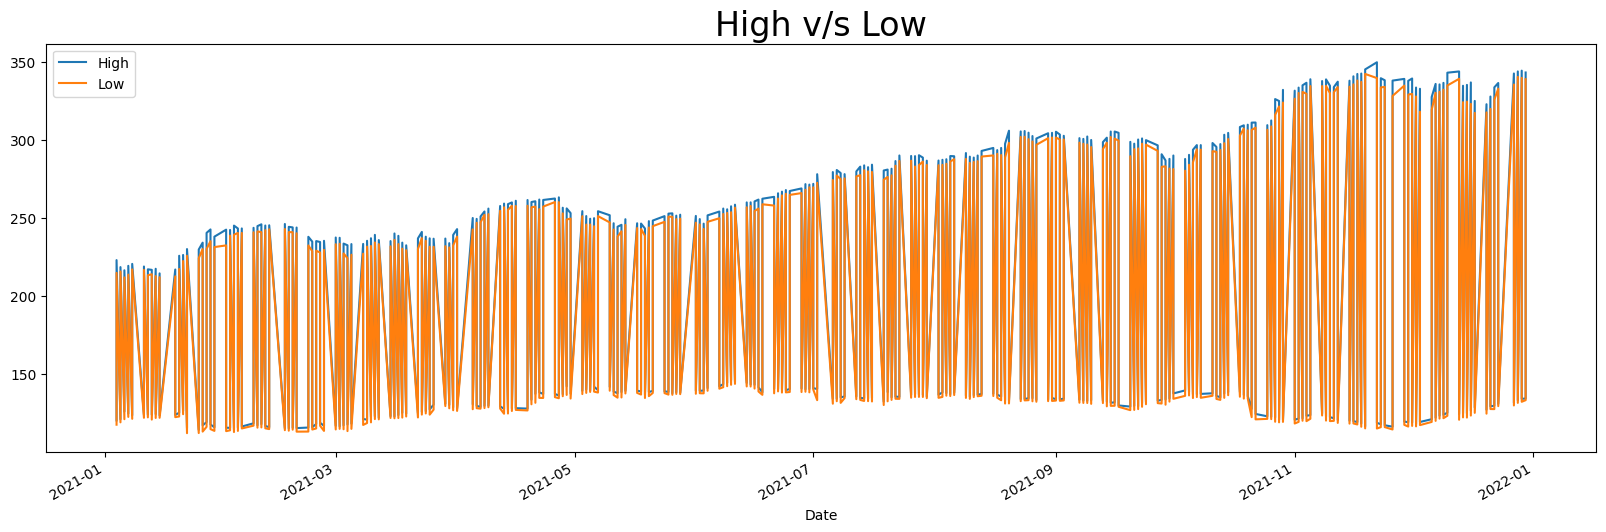

In [6]:
ax = stockfile[['High', 'Low']].plot(figsize=(20, 6))
ax.set_title('High v/s Low', fontsize=24)

Text(0.5, 1.0, 'Closing Prices')

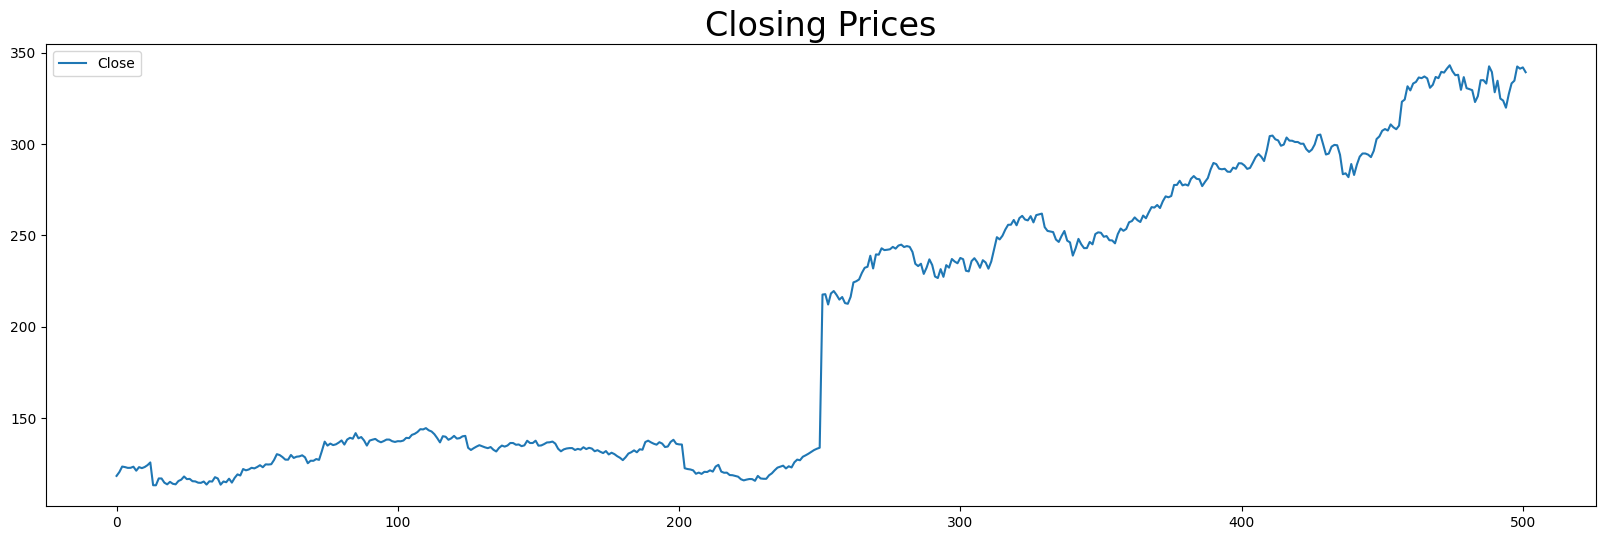

In [34]:
ax = stockfile[['Close']].plot(figsize=(20, 6))
ax.set_title('Closing Prices', fontsize=24)


Text(0.5, 1.0, 'Closing Prices')

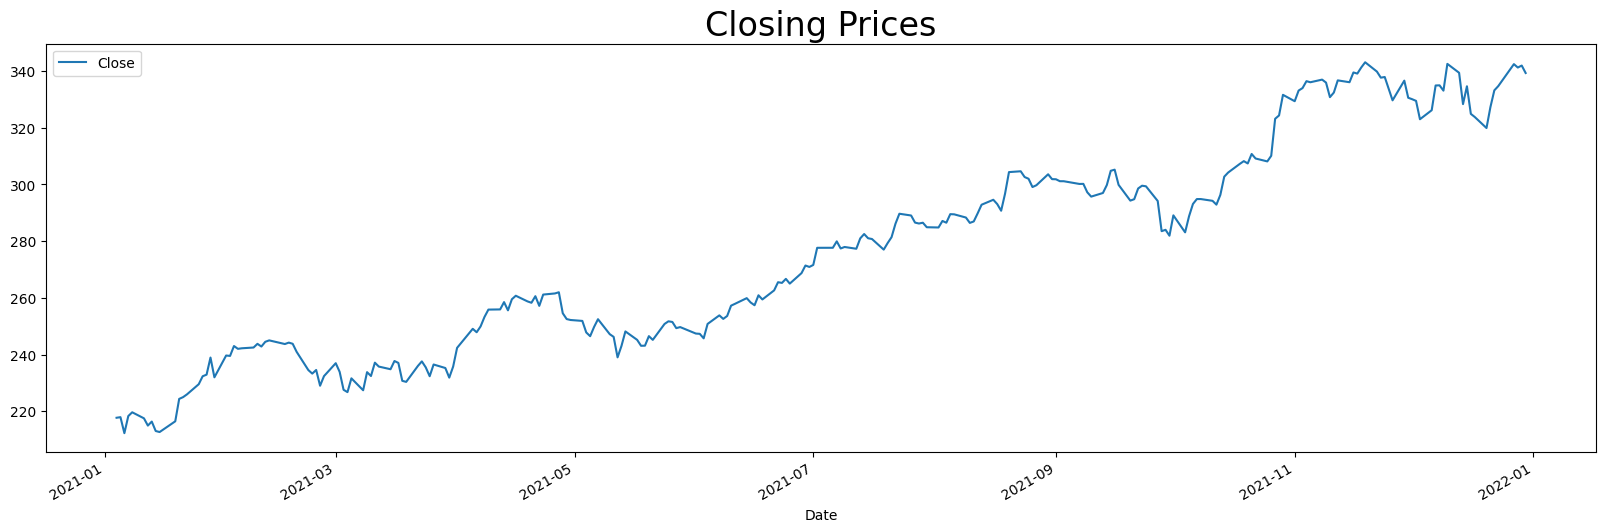

In [7]:
ax = stockfile[stockfile["Company"]=="MSFT"][['Close']]['2019':].plot(figsize=(20, 6))
ax.set_title('Closing Prices', fontsize=24)

Text(0.5, 1.0, 'Closing Prices')

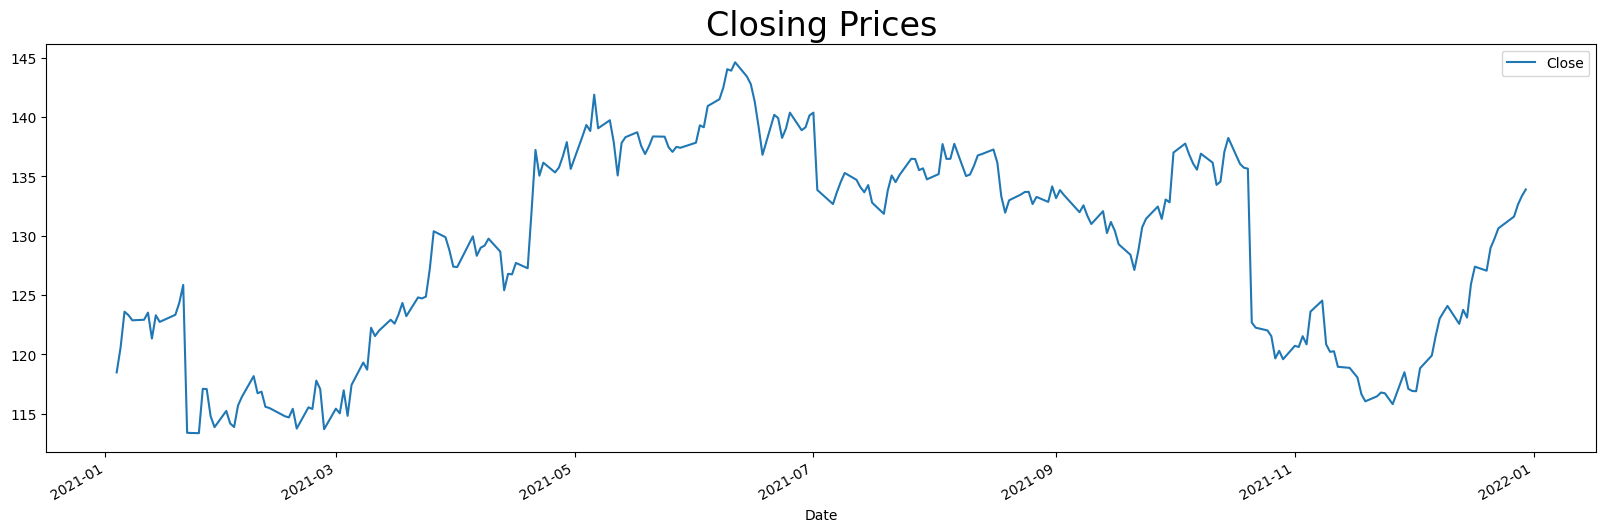

In [8]:
ax = stockfile[stockfile["Company"]=="IBM"][['Close']]['2019':].plot(figsize=(20, 6))
ax.set_title('Closing Prices', fontsize=24)

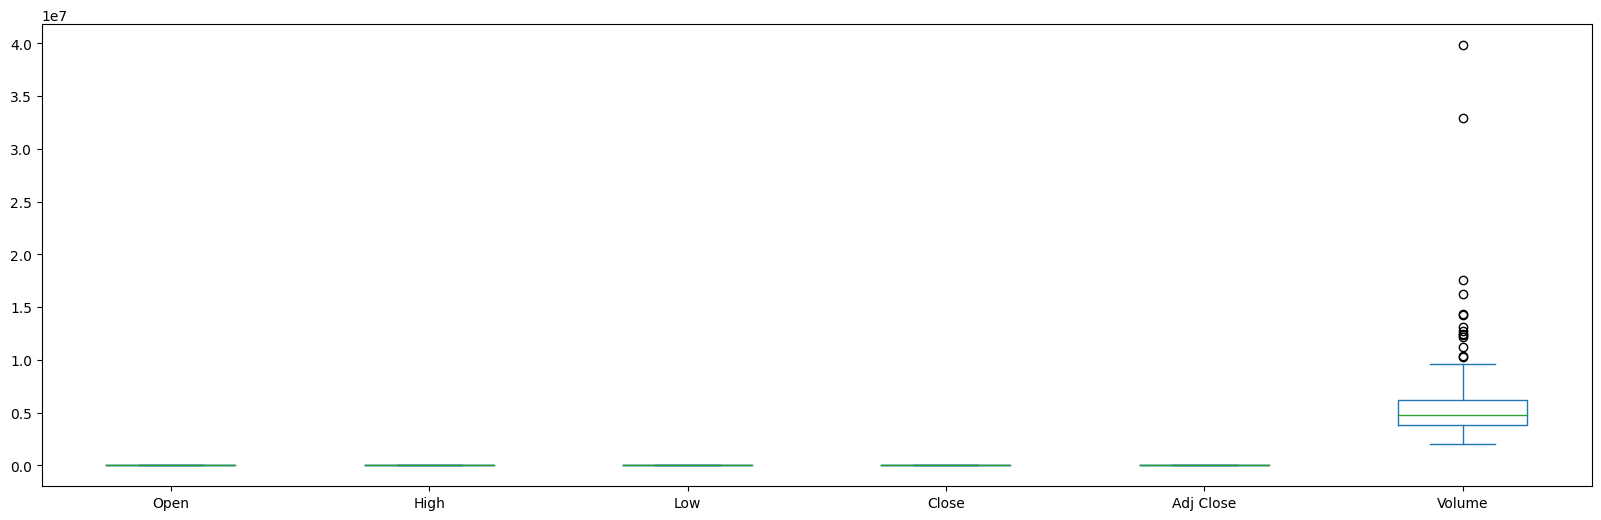

In [9]:
ax = stockfile[stockfile["Company"]=="IBM"].plot.box(figsize=(20, 6))

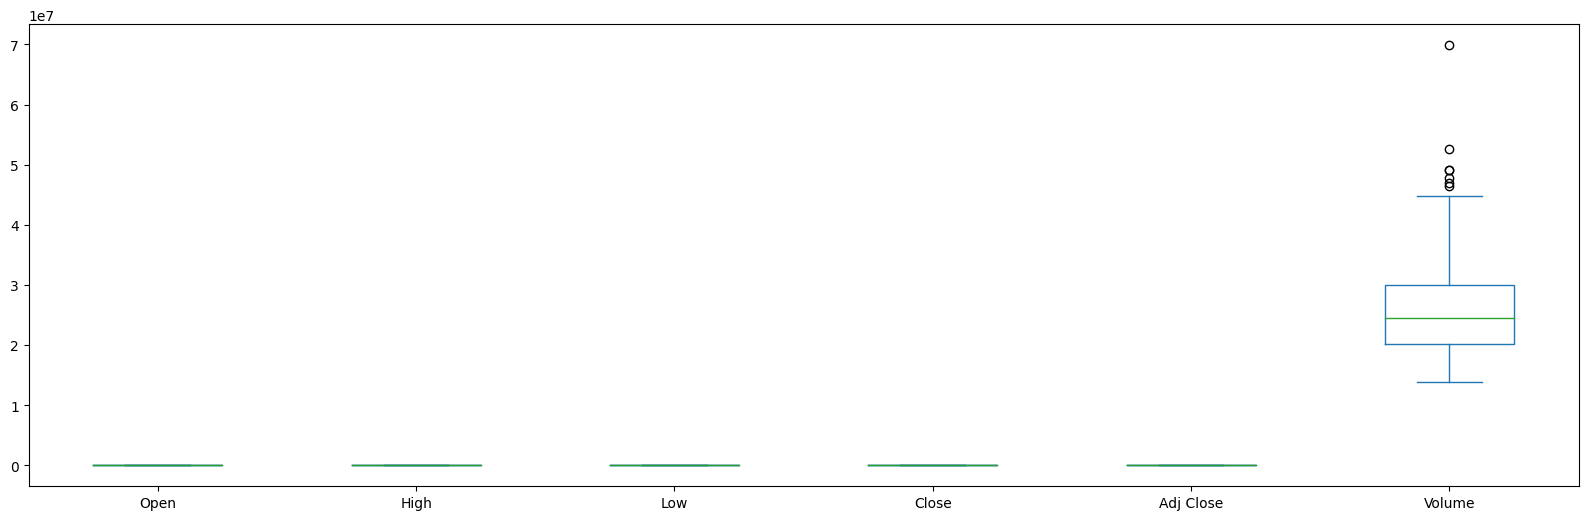

In [10]:
ax = stockfile[stockfile["Company"]=="MSFT"].plot.box(figsize=(20, 6))

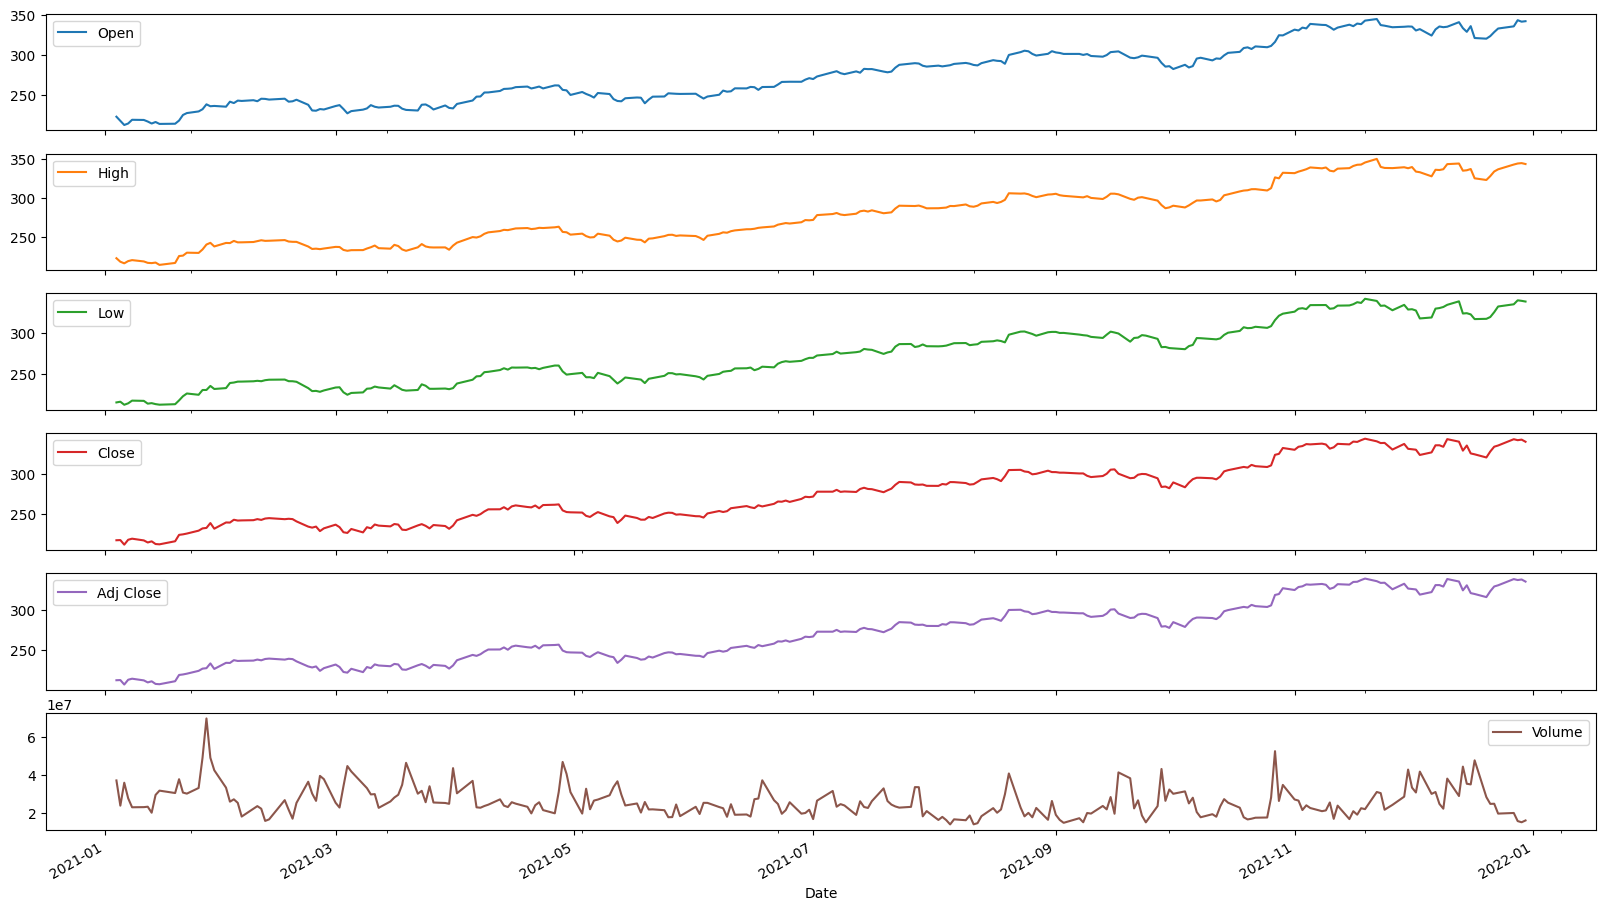

In [11]:
ax = stockfile[stockfile["Company"]=="MSFT"].plot(subplots=True, figsize=(20, 12))

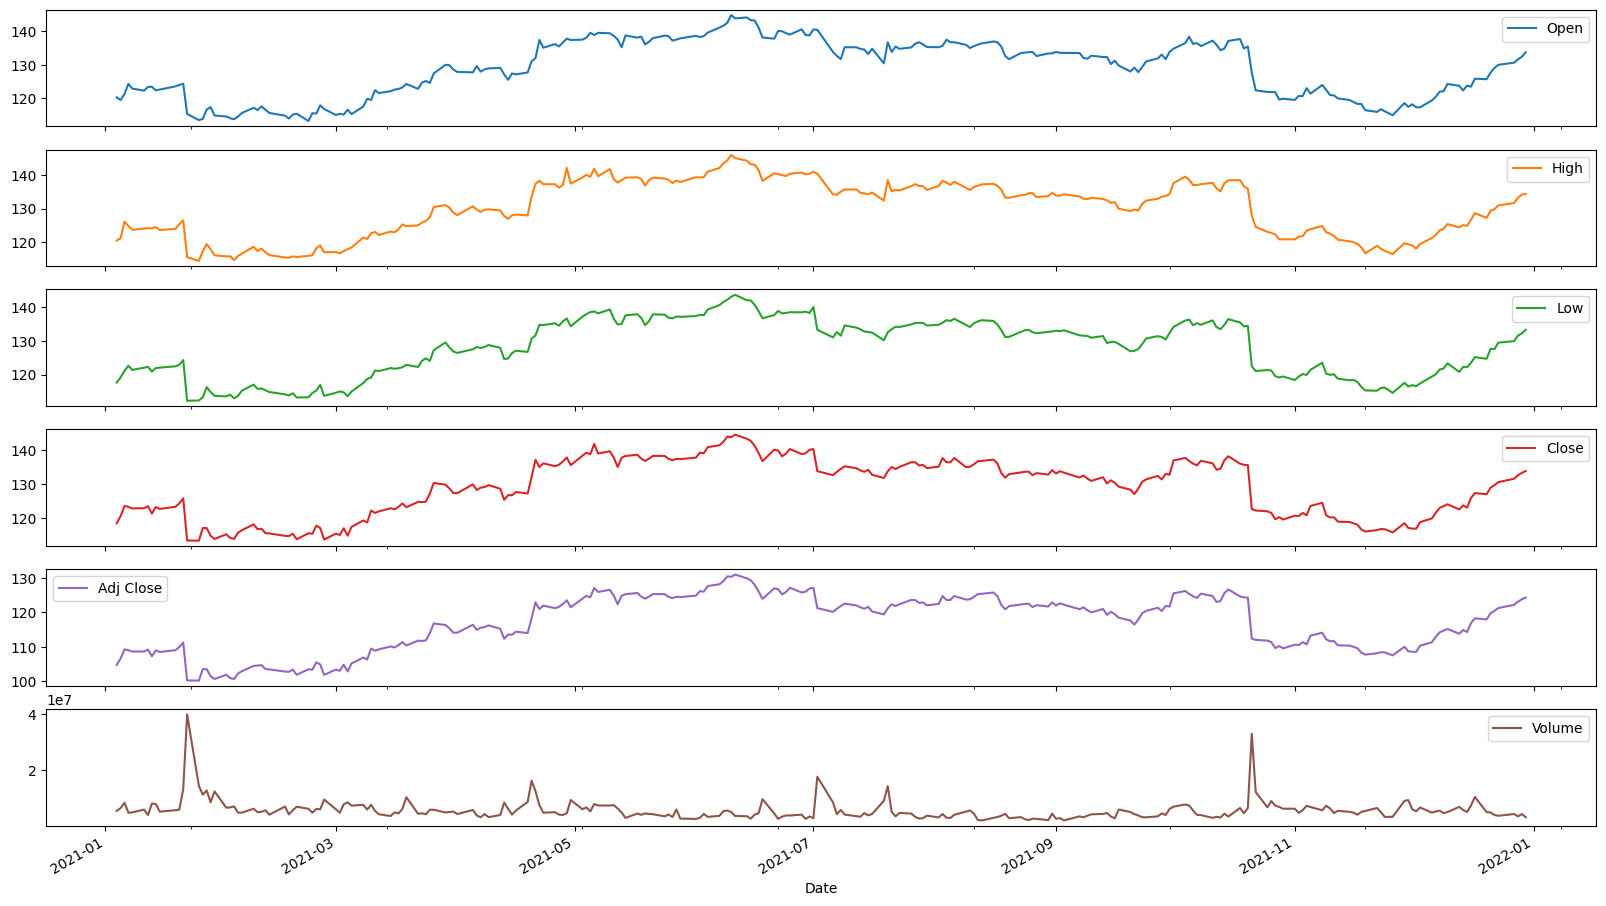

In [12]:
ax = stockfile[stockfile["Company"]=="IBM"].plot(subplots=True, figsize=(20, 12))

Text(0, 0.5, 'Volume')

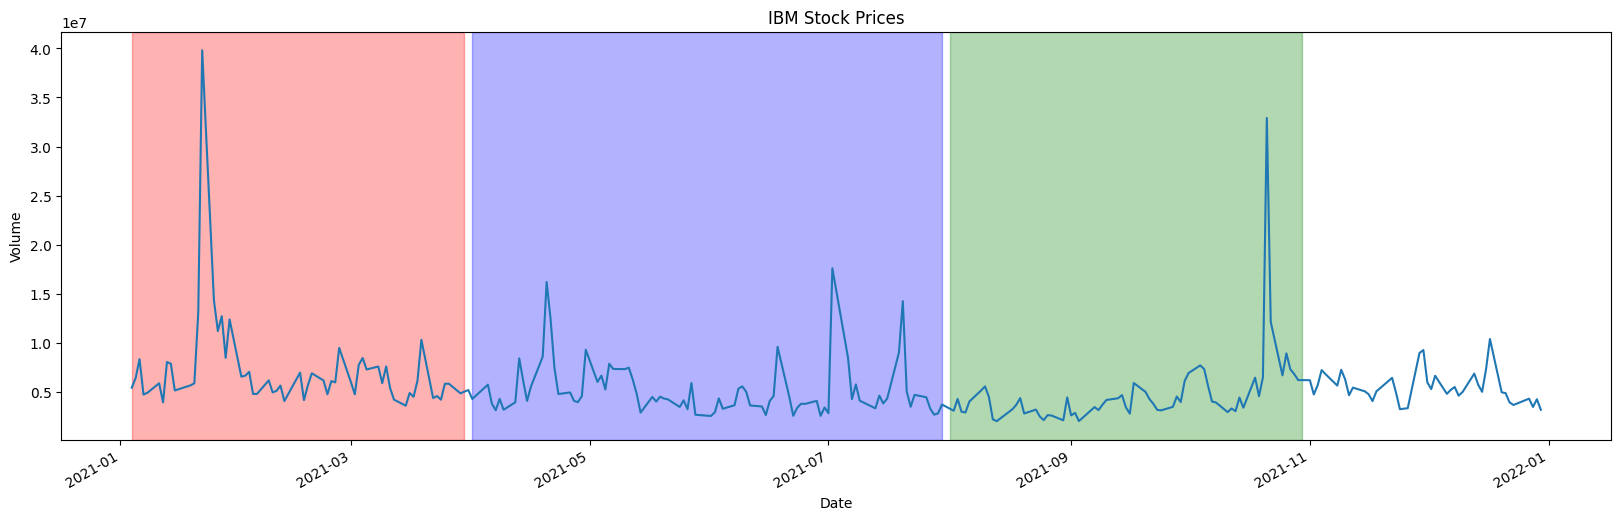

In [13]:
ax = stockfile[stockfile["Company"]=="IBM"]['Volume'].plot(figsize=(20,6))
ax.set_title('IBM Stock Prices')
ax.axvspan('2021-01-04','2021-03-30', color='red', alpha=0.3)
ax.axvspan('2021-04-01','2021-07-30', color='blue', alpha=0.3)
ax.axvspan('2021-08-01','2021-10-30', color='green', alpha=0.3)
ax.set_ylabel('Volume')

Text(0, 0.5, 'Volume')

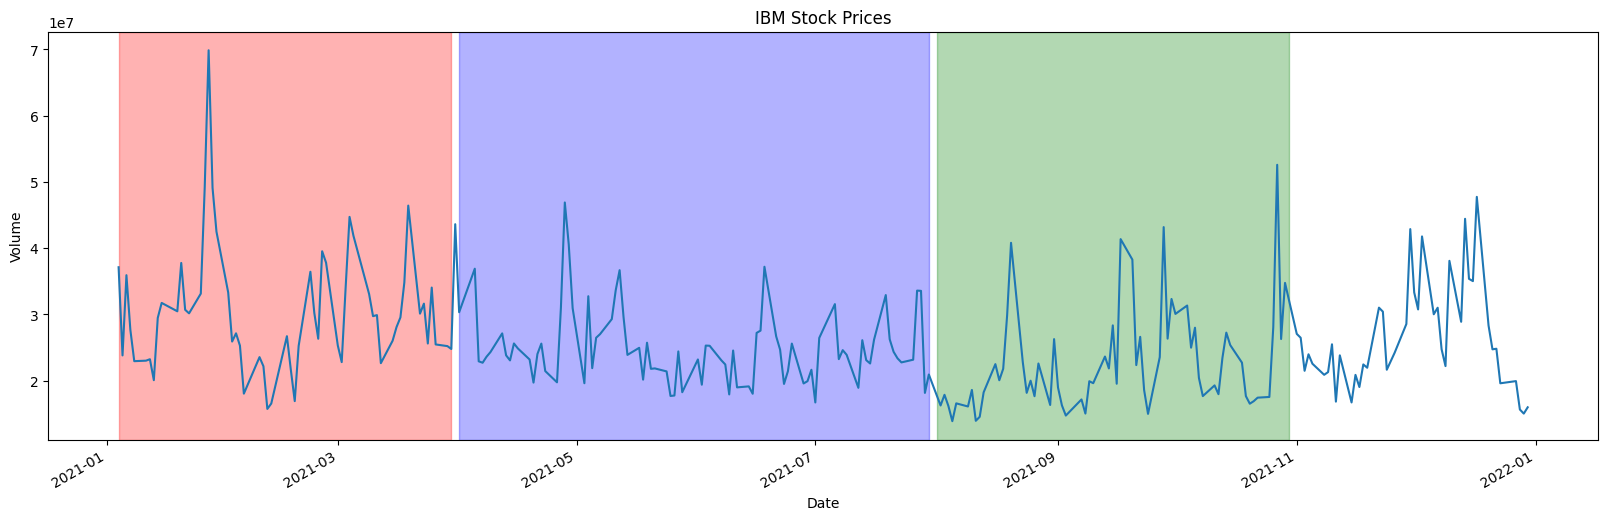

In [14]:
ax = stockfile[stockfile["Company"]=="MSFT"]['Volume'].plot(figsize=(20,6))
ax.set_title('IBM Stock Prices')
ax.axvspan('2021-01-04','2021-03-30', color='red', alpha=0.3)
ax.axvspan('2021-04-01','2021-07-30', color='blue', alpha=0.3)
ax.axvspan('2021-08-01','2021-10-30', color='green', alpha=0.3)
ax.set_ylabel('Volume')

In [68]:
!pip install mplfinance

     ---------------------------------------- 0.0/73.1 kB ? eta -:--:--
     ---------------------------------------- 73.1/73.1 kB 3.9 MB/s eta 0:00:00


In [15]:
import mplfinance as mpf

In [23]:
stockfile_msft = stockfile[stockfile['Company']=='MSFT']
stockfile_ibm = stockfile[stockfile['Company']=='IBM']

In [20]:
stockfile_msft

,Open,High,Low,Close,Adj Close,Volume,Company,vwap
Date,,,,,,,,
2021-01-04,222.529999,223.000000,214.809998,217.690002,212.876663,37130100,MSFT,129.624135
2021-01-05,217.259995,218.520004,215.699997,217.899994,213.082001,23823000,MSFT,131.055880
2021-01-06,212.169998,216.490005,211.940002,212.250000,207.556931,35930700,MSFT,133.037449
2021-01-07,214.039993,219.339996,213.710007,218.289993,213.463394,27694500,MSFT,134.565601
2021-01-08,218.679993,220.580002,217.029999,219.619995,214.763977,22956200,MSFT,135.819957
...,...,...,...,...,...,...,...,...
2021-12-23,332.750000,336.390015,332.730011,334.690002,330.033142,19617800,MSFT,246.697358
2021-12-27,335.459991,342.480011,335.429993,342.450012,337.685150,19947000,MSFT,246.933552
2021-12-28,343.149994,343.809998,340.320007,341.250000,336.501831,15661500,MSFT,247.121481


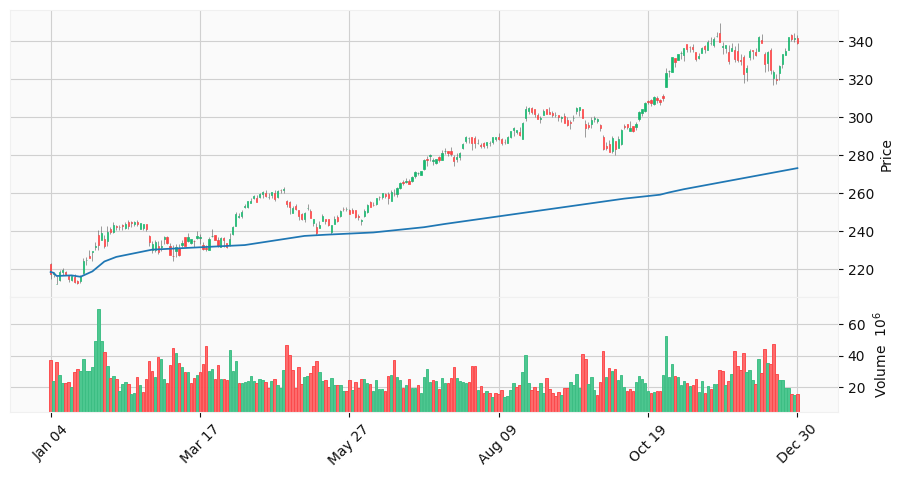

In [24]:
v = stockfile_msft['Volume'].values
tp = (stockfile_msft['Low'] + stockfile_msft['Close'] + stockfile_msft['High']).div(3).values
stockfile_msft = stockfile_msft.assign(vwap=(tp * v).cumsum() / v.cumsum())

adp = mpf.make_addplot(stockfile_msft['vwap'], type='line')
mpf.plot(stockfile_msft, figratio=(8,4), type='candle', addplot=adp, volume=True, style='yahoo')

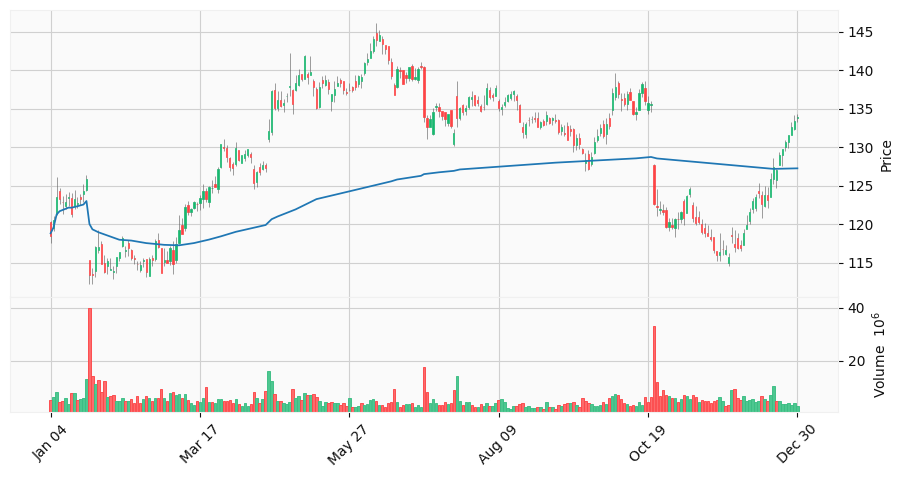

In [25]:
v = stockfile_ibm['Volume'].values
tp = (stockfile_ibm['Low'] + stockfile_ibm['Close'] + stockfile_ibm['High']).div(3).values
stockfile_ibm = stockfile_ibm.assign(vwap=(tp * v).cumsum() / v.cumsum())

adp = mpf.make_addplot(stockfile_ibm['vwap'], type='line')
mpf.plot(stockfile_ibm, figratio=(8,4), type='candle', addplot=adp, volume=True, style='yahoo')

In [72]:
stockfile

,Open,High,Low,Close,Adj Close,Volume,Company,close_diff,cumulative_volume,typical_price,cumulative_typical_price,VWAP,vwap
Date,,,,,,,,,,,,,
2021-01-04,120.315491,120.382408,117.629066,118.489487,104.750336,5417443,IBM,NaN,-5417443,118.833654,118.833654,-118.833654,118.833654
2021-01-05,119.512428,121.108986,119.130020,120.592735,106.609711,6395872,IBM,2.103249,0,120.277247,239.110901,inf,119.615233
2021-01-06,121.319313,126.080307,121.147224,123.604210,109.271996,8322708,IBM,3.011475,8322708,123.610580,362.721481,362.721481,121.266607
2021-01-07,124.321220,124.722755,122.619499,123.317398,109.018440,4714740,IBM,-0.286812,0,123.553218,486.274699,inf,121.700428
2021-01-08,122.915871,123.632889,121.395790,122.877632,108.629654,4891305,IBM,-0.439766,-4891305,122.635437,608.910136,-608.910136,121.854197
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,332.750000,336.390015,332.730011,334.690002,330.033142,19617800,MSFT,1.489990,431591600,334.603343,100166.506930,4553.023042,246.697358
2021-12-27,335.459991,342.480011,335.429993,342.450012,337.685150,19947000,MSFT,7.760010,458781000,340.120005,100506.626935,4369.853345,246.933552
2021-12-28,343.149994,343.809998,340.320007,341.250000,336.501831,15661500,MSFT,-1.200012,344553000,341.793335,100848.420270,4584.019103,247.121481


In [1]:
!pip install statsmodels

     ---------------------------------------- 0.0/9.4 MB ? eta -:--:--
     - -------------------------------------- 0.5/9.4 MB 9.4 MB/s eta 0:00:01
     ------------ --------------------------- 2.8/9.4 MB 30.1 MB/s eta 0:00:01
     ---------------------- ----------------- 5.2/9.4 MB 41.9 MB/s eta 0:00:01
     ---------------------------------- ----- 8.1/9.4 MB 43.1 MB/s eta 0:00:01
     ---------------------------------------  9.4/9.4 MB 46.1 MB/s eta 0:00:01
     ---------------------------------------  9.4/9.4 MB 46.1 MB/s eta 0:00:01
     ---------------------------------------- 9.4/9.4 MB 33.3 MB/s eta 0:00:00
     ---------------------------------------- 0.0/233.8 kB ? eta -:--:--
     ------------------------------------ - 225.3/233.8 kB 4.6 MB/s eta 0:00:01
     -------------------------------------- 233.8/233.8 kB 3.6 MB/s eta 0:00:00


Seasonal Decomposition

Text(0.5, 0.98, 'Additive Decompose')

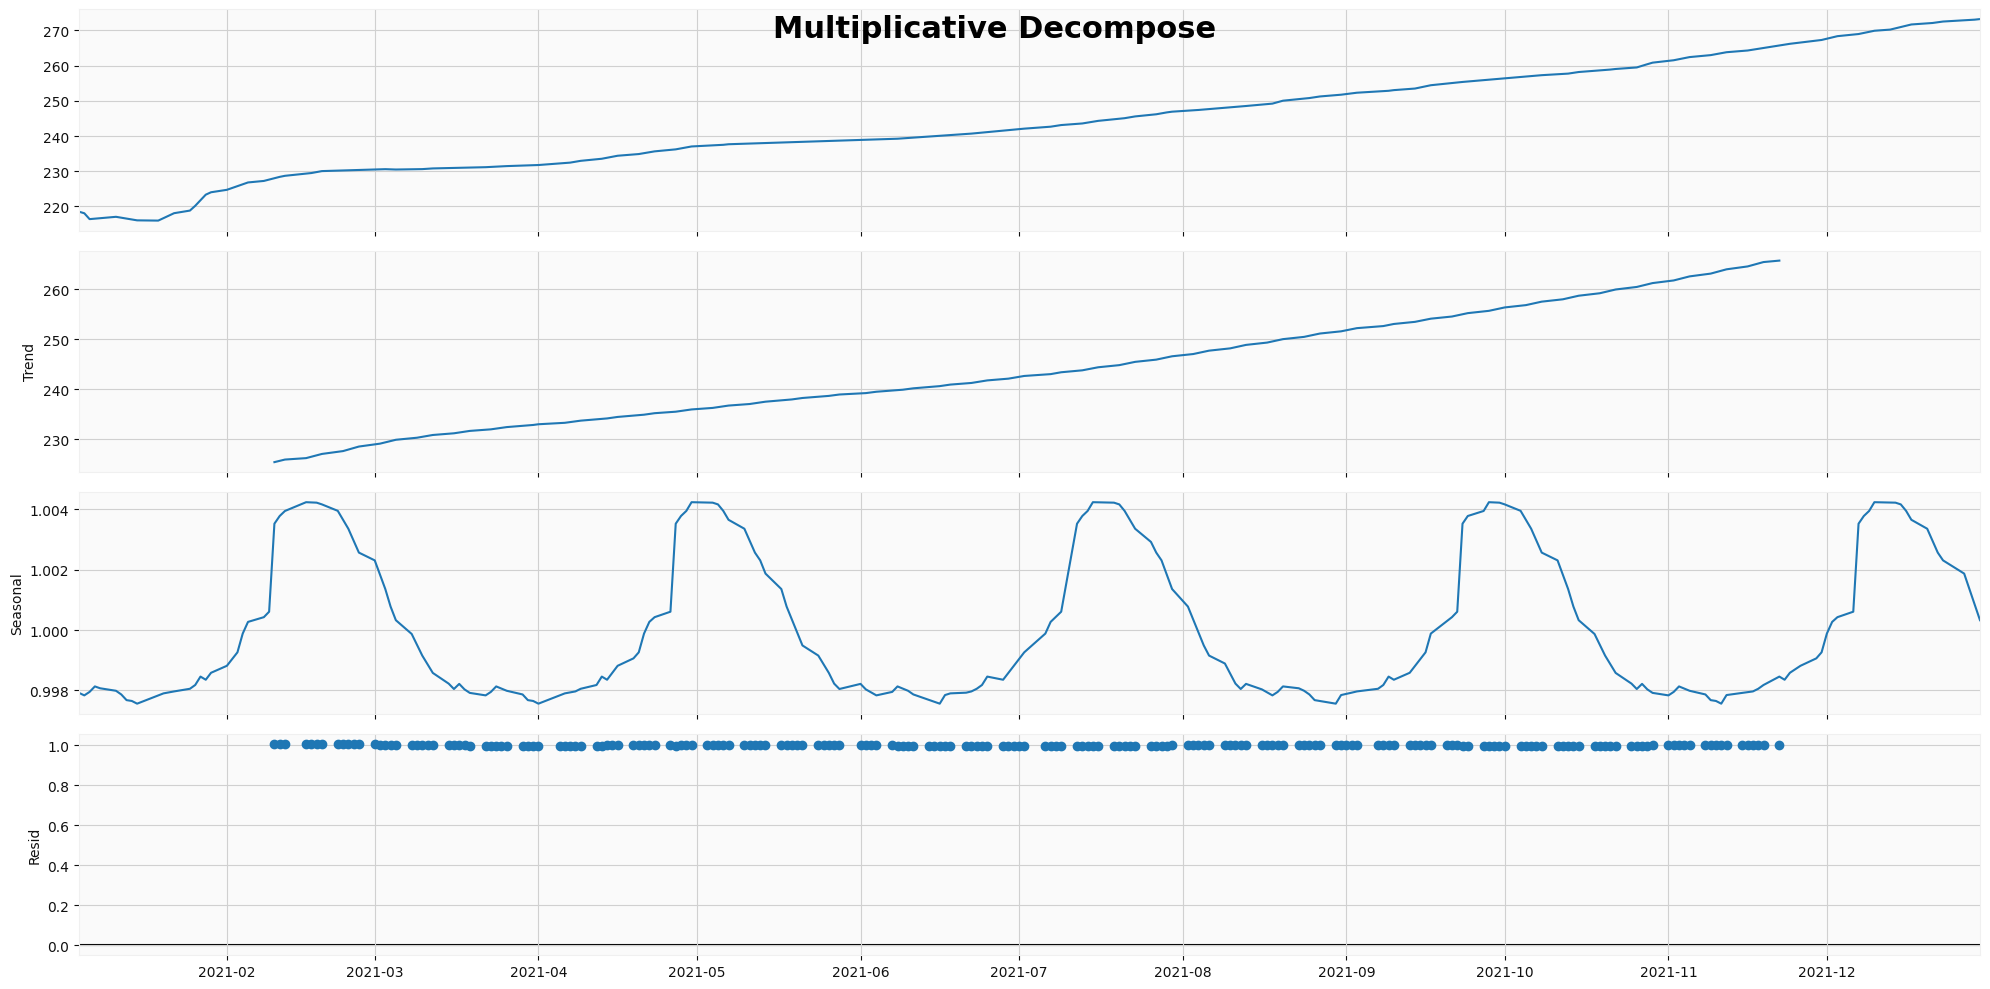

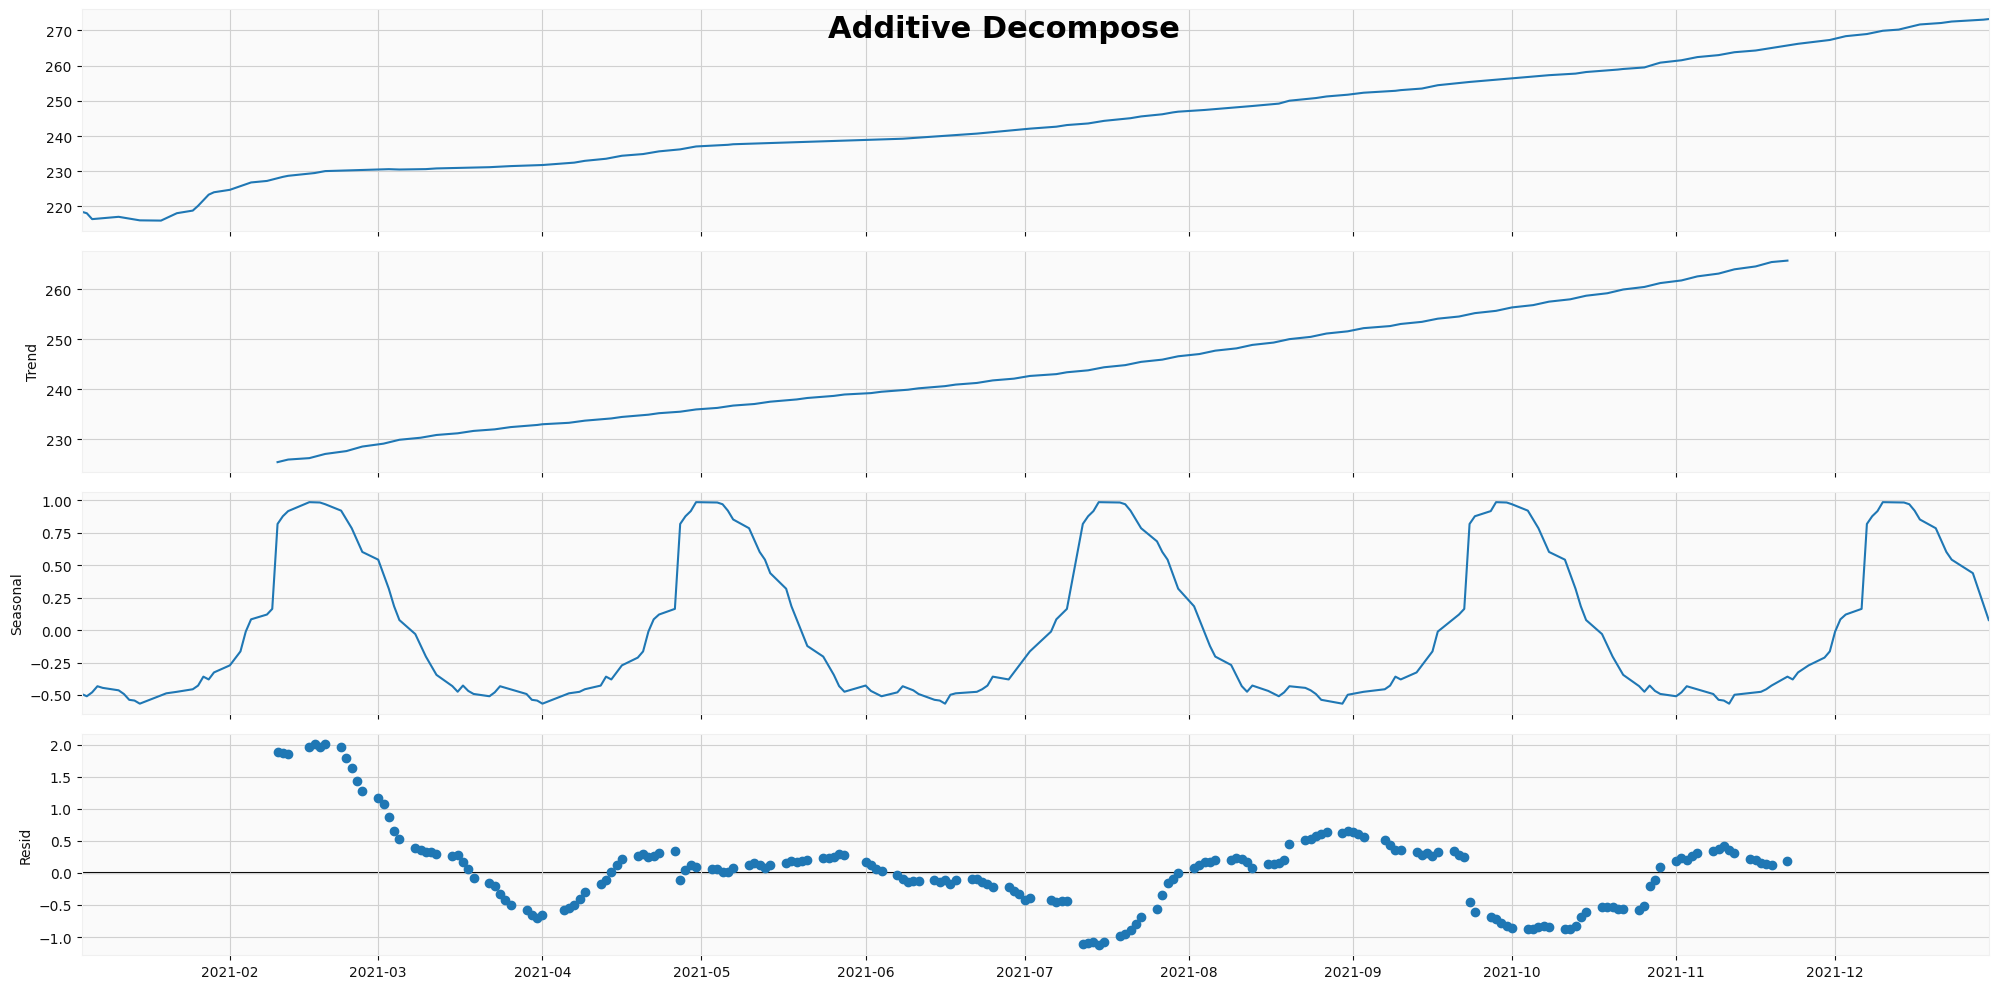

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

plt.rcParams.update({'figure.figsize': (20,10)})
y = stockfile_msft['vwap'].to_frame()


# Multiplicative Decomposition 
seasonal_decompose(y, model='multiplicative',period = 52).plot().suptitle('Multiplicative Decompose', fontsize=22)

# Additive Decomposition
seasonal_decompose(y, model='additive',period = 52).plot().suptitle('Additive Decompose', fontsize=22)

Text(0.5, 0.98, 'Additive Decompose')

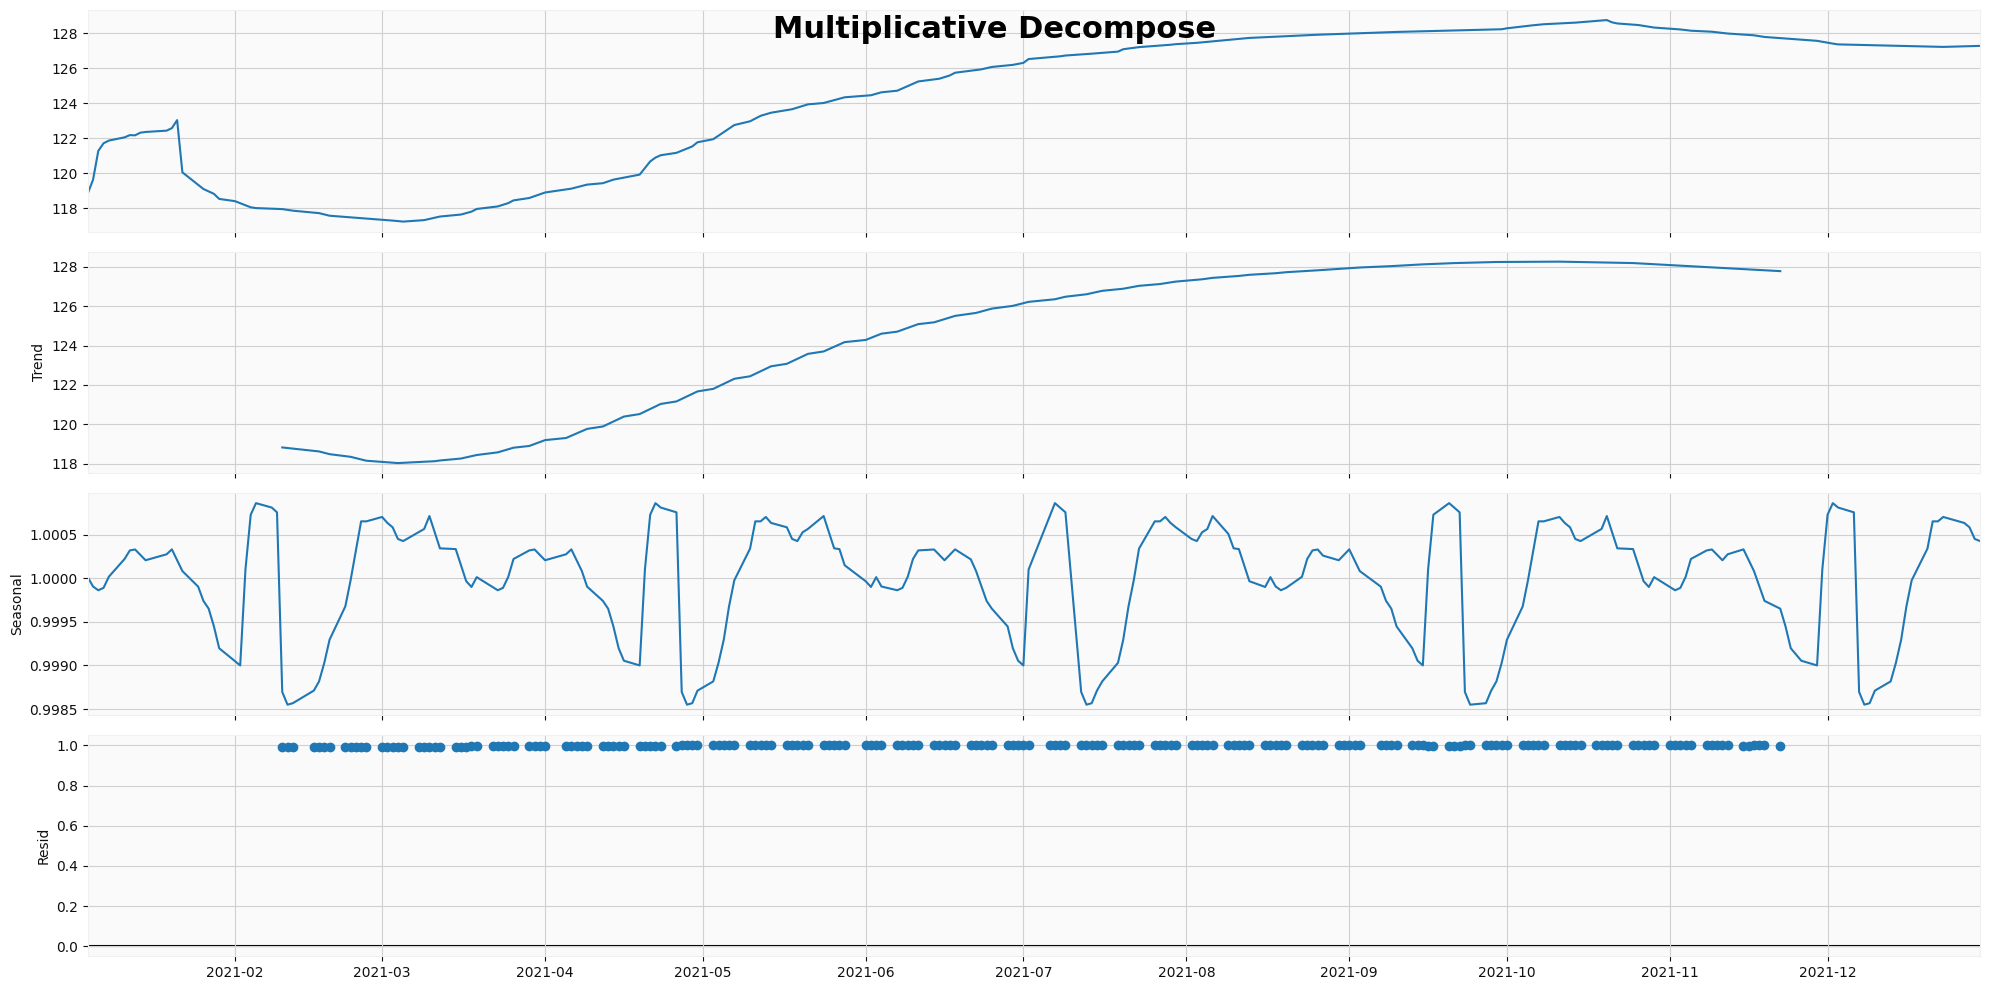

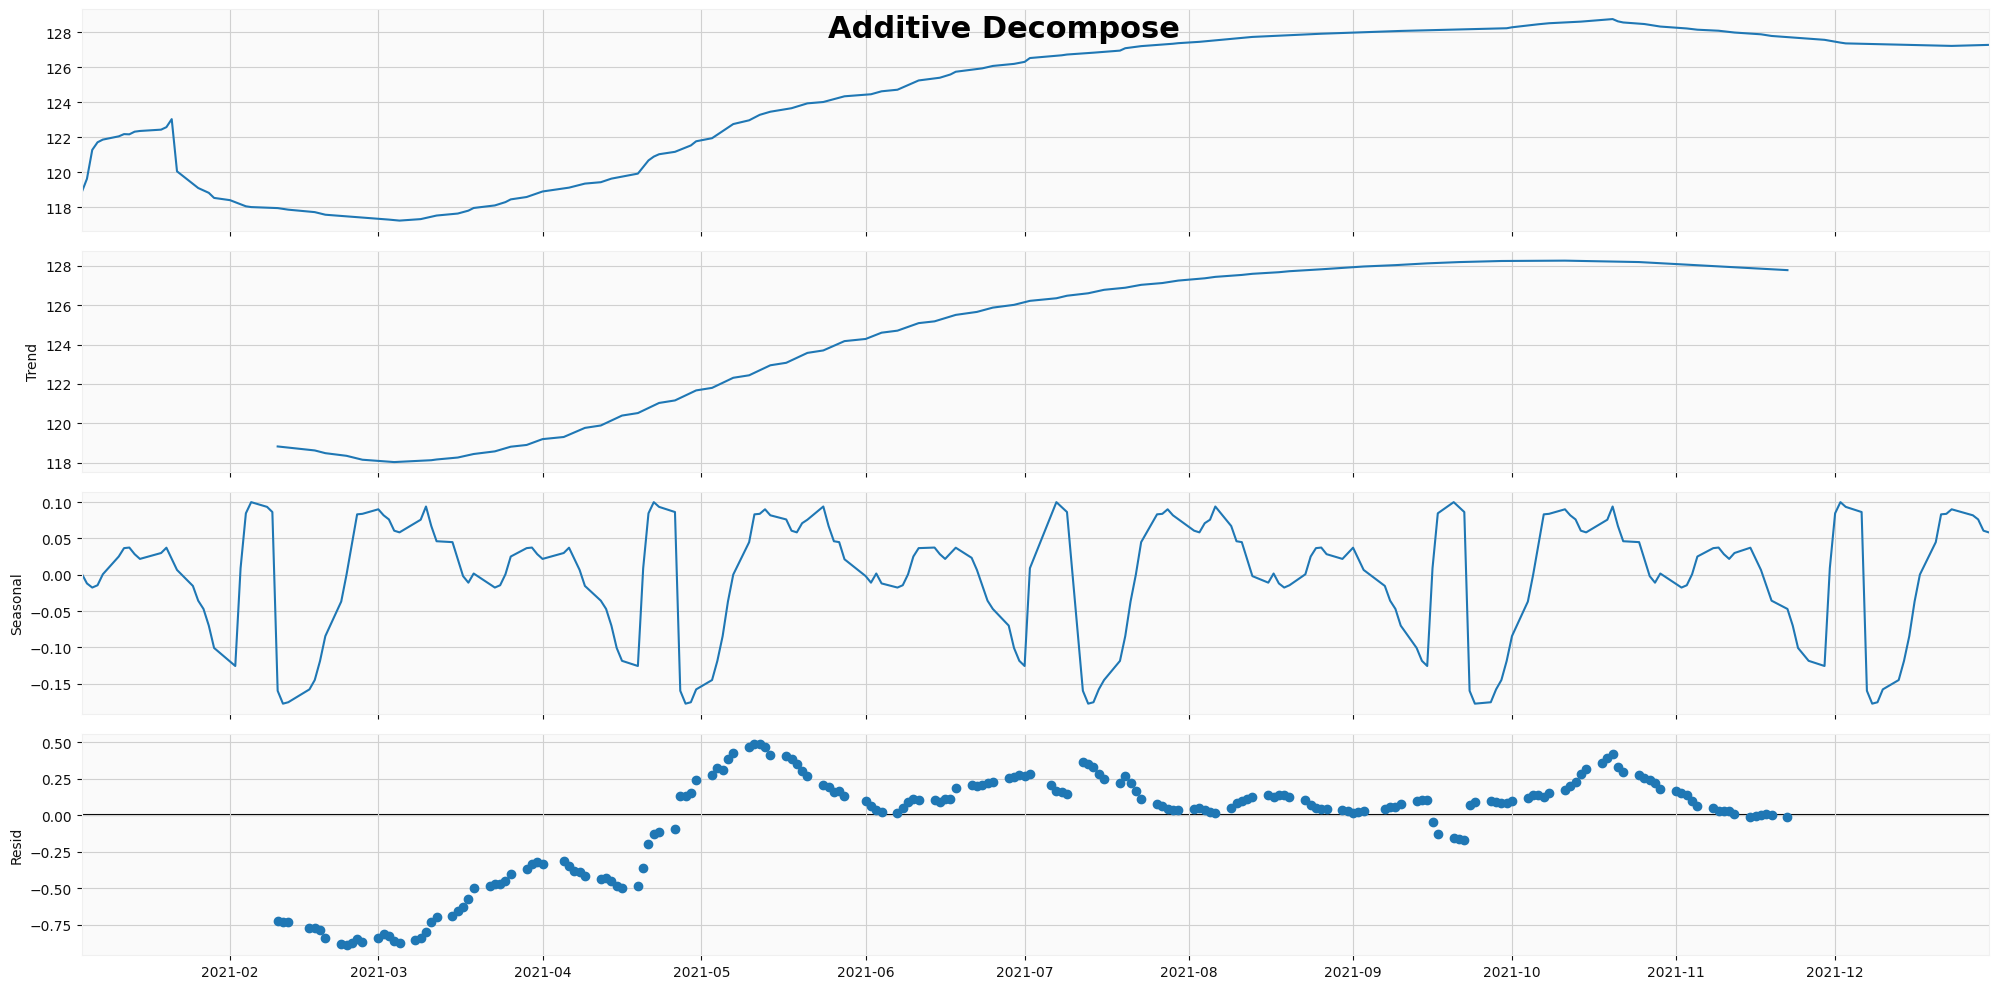

In [27]:
y = stockfile_ibm['vwap'].to_frame()


# Multiplicative Decomposition 
seasonal_decompose(y, model='multiplicative',period = 52).plot().suptitle('Multiplicative Decompose', fontsize=22)

# Additive Decomposition
seasonal_decompose(y, model='additive',period = 52).plot().suptitle('Additive Decompose', fontsize=22)

Stationarity

In [30]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string(), '\n')          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")
        
    return out

adf_test(stockfile_msft['vwap'],title='Microsoft Stock Data')
adf_test(stockfile_ibm['vwap'],title='IBM Stock Data')



Augmented Dickey-Fuller Test: Microsoft Stock Data
ADF test statistic        3.171441
p-value                   1.000000
# lags used              16.000000
# observations          234.000000
critical value (1%)      -3.458608
critical value (5%)      -2.873972
critical value (10%)     -2.573396 

Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary
Augmented Dickey-Fuller Test: IBM Stock Data
ADF test statistic       -4.060685
p-value                   0.001124
# lags used              16.000000
# observations          234.000000
critical value (1%)      -3.458608
critical value (5%)      -2.873972
critical value (10%)     -2.573396 

Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


ADF test statistic       -4.060685
p-value                   0.001124
# lags used              16.000000
# observations          234.000000
critical value (1%)      -3.458608
critical value (5%)      -2.873972
critical value (10%)     -2.573396
dtype: float64

In [31]:
import statsmodels.api as sm

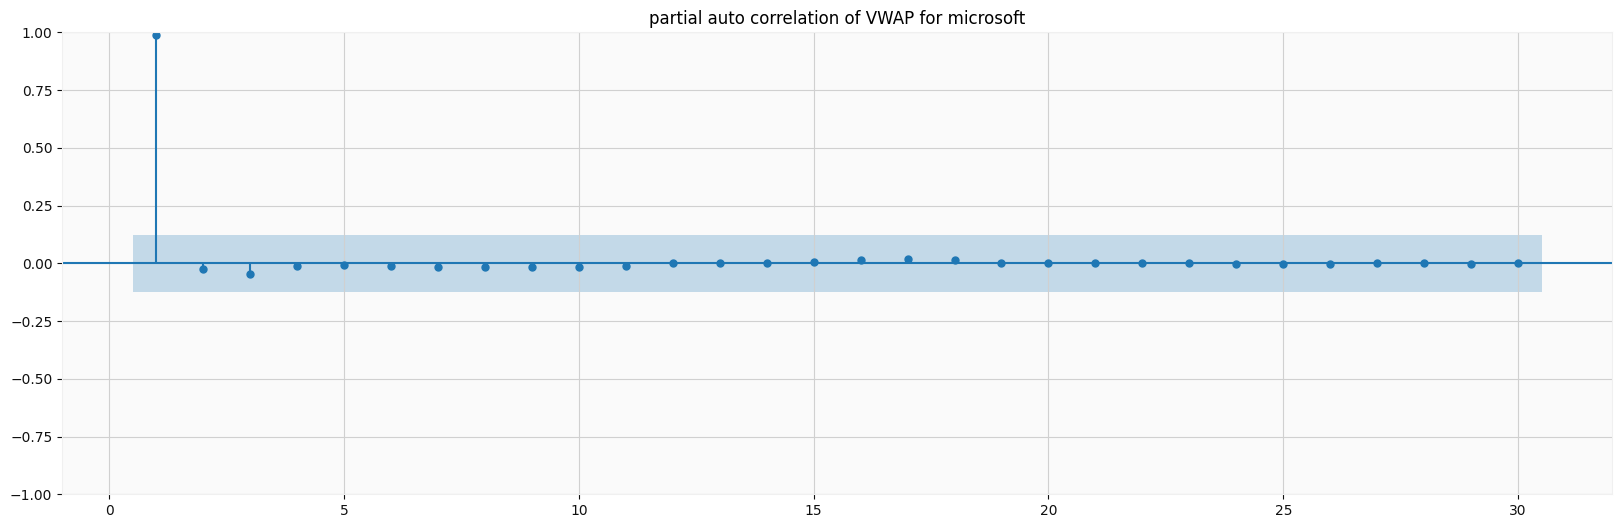

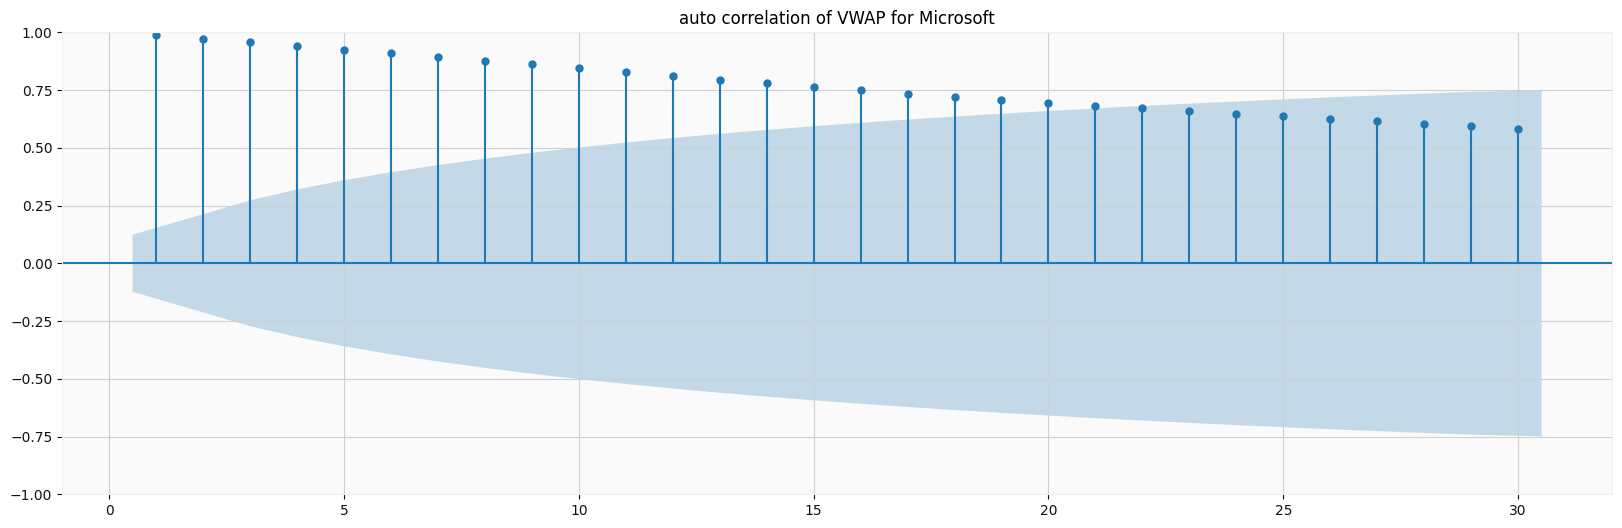

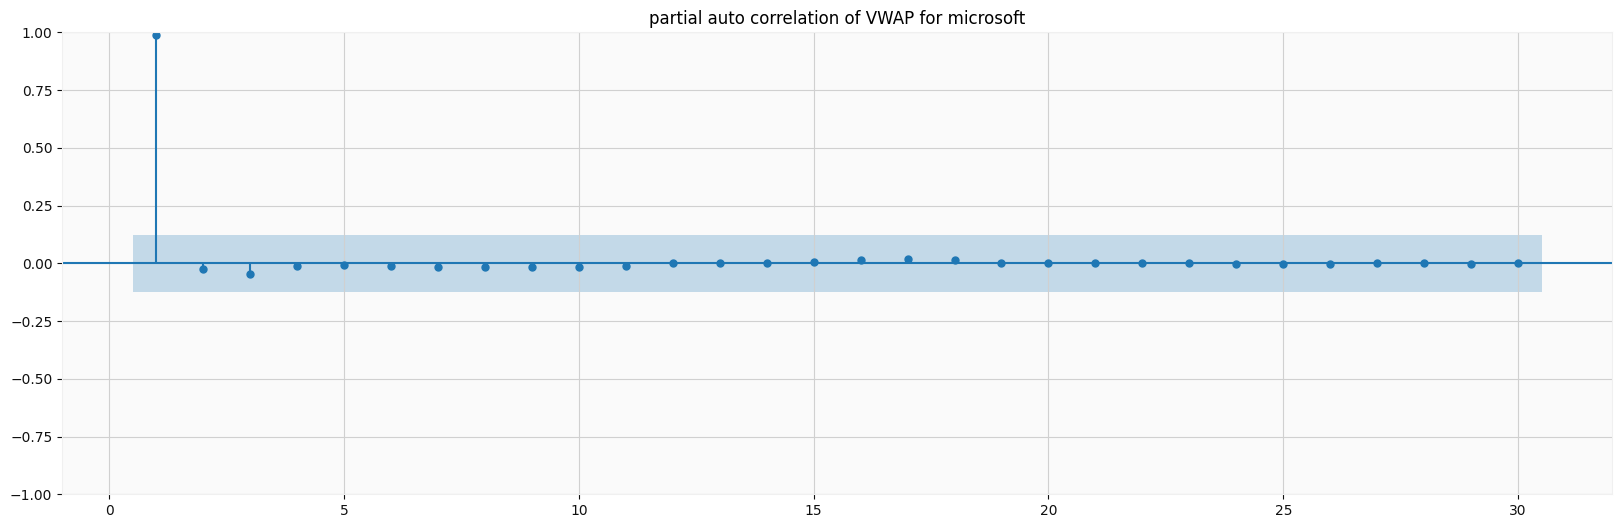

In [33]:
plt.rcParams.update({'figure.figsize': (20,6)})

sm.graphics.tsa.plot_acf(stockfile_msft['vwap'], lags=30,title='auto correlation of VWAP for Microsoft',zero=False);
sm.graphics.tsa.plot_pacf(stockfile_msft['vwap'], lags=30,title='partial auto correlation of VWAP for microsoft',zero=False)

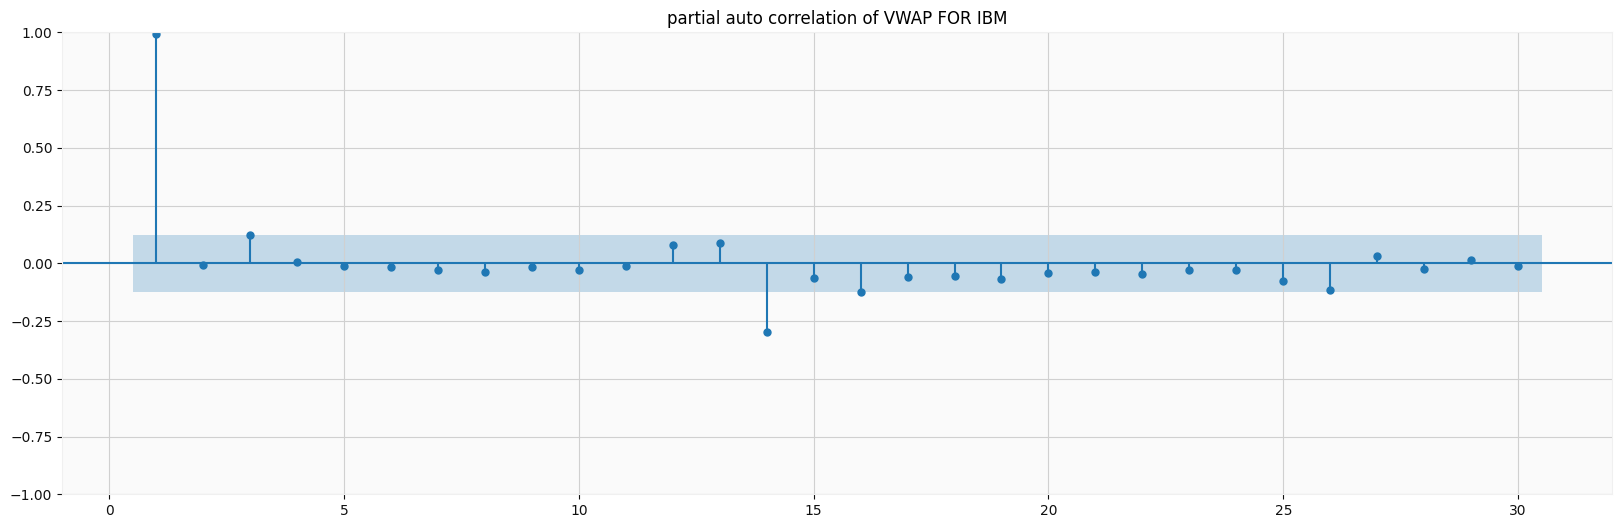

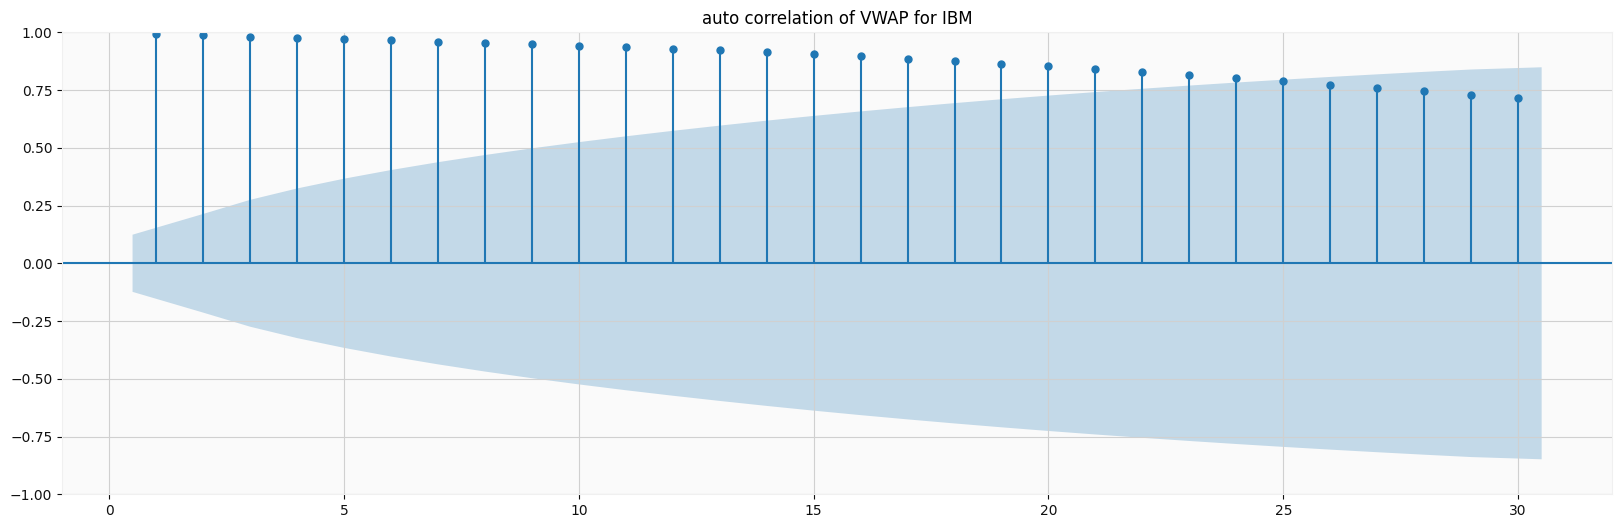

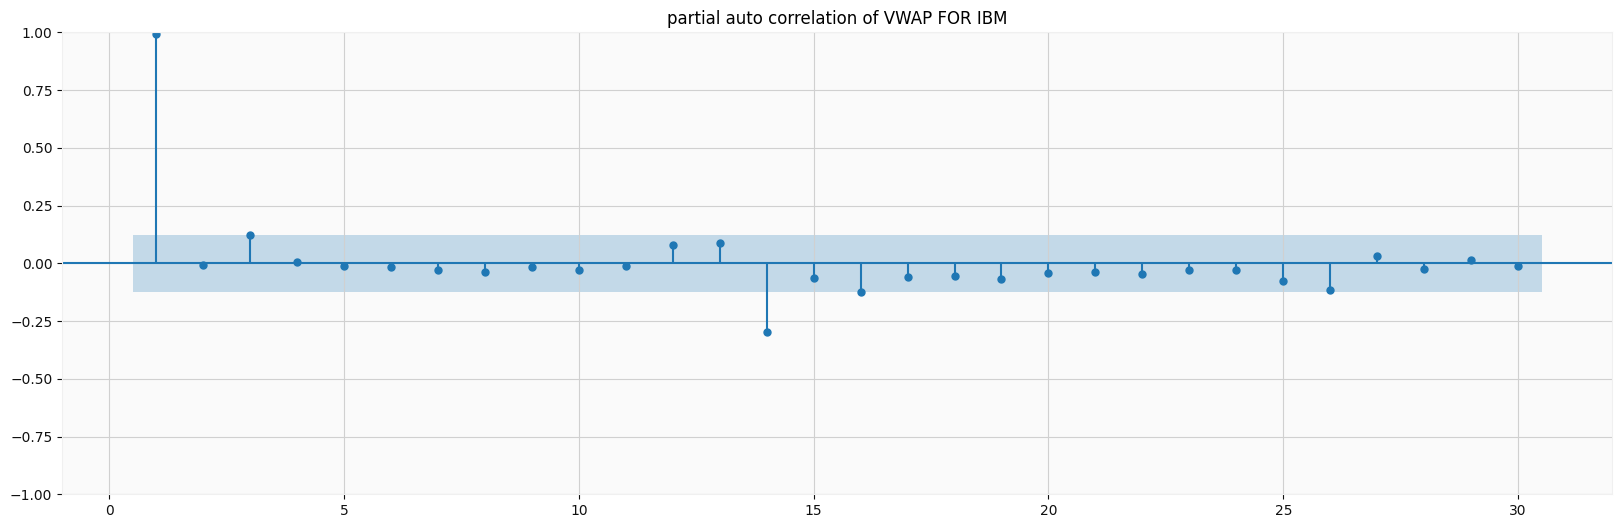

In [34]:
sm.graphics.tsa.plot_acf(stockfile_ibm['vwap'], lags=30,title='auto correlation of VWAP for IBM',zero=False);
sm.graphics.tsa.plot_pacf(stockfile_ibm['vwap'], lags=30,title='partial auto correlation of VWAP FOR IBM',zero=False)

In [37]:
data_msft = stockfile_msft.reset_index()
lag_features = ["Open", "High", "Low", "Close", "vwap", "Volume"]
window1 = 3
window2 = 7
window3 = 30

df_rolled_3d = data_msft[lag_features].rolling(window=window1, min_periods=0)
df_rolled_7d = data_msft[lag_features].rolling(window=window2, min_periods=0)
df_rolled_30d = data_msft[lag_features].rolling(window=window3, min_periods=0)

df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index().astype(np.float32)
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index().astype(np.float32)
df_std_3d = df_rolled_3d.std().shift(1).reset_index().astype(np.float32)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)
df_std_30d = df_rolled_30d.std().shift(1).reset_index().astype(np.float32)

for feature in lag_features:
    data_msft[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
    data_msft[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
    data_msft[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]
    
    data_msft[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
    data_msft[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
    data_msft[f"{feature}_std_lag{window3}"] = df_std_30d[feature]

data_msft.set_index("Date", drop=False, inplace=True)
data_msft.interpolate('pad',inplace=True)
data_msft.fillna(data_msft.mean(), inplace=True)
data_msft.head()


C:\Users\ACER\AppData\Local\Temp\ipykernel_17396\3825623103.py:29: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data_msft.fillna(data_msft.mean(), inplace=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_17396\3825623103.py:29: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_msft.fillna(data_msft.mean(), inplace=True)


,Date,Open,High,Low,Close,Adj Close,Volume,Company,vwap,Open_mean_lag3,...,vwap_mean_lag30,vwap_std_lag3,vwap_std_lag7,vwap_std_lag30,Volume_mean_lag3,Volume_mean_lag7,Volume_mean_lag30,Volume_std_lag3,Volume_std_lag7,Volume_std_lag30
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,2021-01-04,222.529999,223.000000,214.809998,217.690002,212.876663,37130100,MSFT,218.500000,274.670380,...,241.297318,0.247212,0.524271,1.981770,26163790.0,26258628.0,26205882.0,4616195.0,5884364.5,7180487.0
2021-01-05,2021-01-05,217.259995,218.520004,215.699997,217.899994,213.082001,23823000,MSFT,218.059651,222.529999,...,218.500000,0.247212,0.524271,1.981770,37130100.0,37130100.0,37130100.0,4616195.0,5884364.5,7180487.0
2021-01-06,2021-01-06,212.169998,216.490005,211.940002,212.250000,207.556931,35930700,MSFT,216.390894,219.894989,...,218.279831,0.311374,0.311374,0.311374,30476550.0,30476550.0,30476550.0,9409541.0,9409541.0,9409541.0
2021-01-07,2021-01-07,214.039993,219.339996,213.710007,218.289993,213.463394,27694500,MSFT,216.551496,217.319992,...,217.650177,1.112578,1.112578,1.112578,32294600.0,32294600.0,32294600.0,7361090.0,7361090.0,7361090.0
2021-01-08,2021-01-08,218.679993,220.580002,217.029999,219.619995,214.763977,22956200,MSFT,216.944410,214.489990,...,217.375504,0.920604,1.061602,1.061602,29149400.0,31144576.0,31144576.0,6183579.0,6435370.5,6435370.5


In [40]:
import numpy as np

def calculate_rolling_mean(df, lag_features, window):
    df_rolled = df[lag_features].rolling(window=window, min_periods=0)
    df_mean = df_rolled.mean().shift(1).reset_index().astype(np.float32)
    return df_mean

def calculate_rolling_std(df, lag_features, window):
    df_rolled = df[lag_features].rolling(window=window, min_periods=0)
    df_std = df_rolled.std().shift(1).reset_index().astype(np.float32)
    return df_std

def add_rolling_features(df, lag_features, window1, window2, window3):
    df_mean_3d = calculate_rolling_mean(df, lag_features, window1)
    df_mean_7d = calculate_rolling_mean(df, lag_features, window2)
    df_mean_30d = calculate_rolling_mean(df, lag_features, window3)
    df_std_3d = calculate_rolling_std(df, lag_features, window1)
    df_std_7d = calculate_rolling_std(df, lag_features, window2)
    df_std_30d = calculate_rolling_std(df, lag_features, window3)
    
    for feature in lag_features:
        df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
        df[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
        df[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]
        
        df[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
        df[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
        df[f"{feature}_std_lag{window3}"] = df_std_30d[feature]
    
    return df

def preprocess_data(df):
    df.interpolate('pad', inplace=True)
    df.fillna(df.mean(), inplace=True)
    df.set_index("Date", drop=False, inplace=True)
    return df

# Reset index
data_ibm = stockfile_ibm.reset_index()

# Define lag features and windows
lag_features = ["Open", "High", "Low", "Close", "vwap", "Volume"]
window1 = 3
window2 = 7
window3 = 30

# Add rolling mean and standard deviation features
data_ibm = add_rolling_features(data_ibm, lag_features, window1, window2, window3)

# Preprocess data
data_ibm = preprocess_data(data_ibm)

# Display the resulting dataframe
data_ibm.head()


C:\Users\ACER\AppData\Local\Temp\ipykernel_17396\570625648.py:34: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean(), inplace=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_17396\570625648.py:34: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


,Date,Open,High,Low,Close,Adj Close,Volume,Company,vwap,Open_mean_lag3,...,vwap_mean_lag30,vwap_std_lag3,vwap_std_lag7,vwap_std_lag30,Volume_mean_lag3,Volume_mean_lag7,Volume_mean_lag30,Volume_std_lag3,Volume_std_lag7,Volume_std_lag30
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,2021-01-04,120.315491,120.382408,117.629066,118.489487,104.750336,5417443,IBM,118.833654,128.823776,...,123.973671,0.094540,0.204857,0.721429,5590261.0,5607762.0,5682390.5,1604039.375,2134952.75,3035071.50
2021-01-05,2021-01-05,119.512428,121.108986,119.130020,120.592735,106.609711,6395872,IBM,119.615233,120.315491,...,118.833656,0.094540,0.204857,0.721429,5417443.0,5417443.0,5417443.0,1604039.375,2134952.75,3035071.50
2021-01-06,2021-01-06,121.319313,126.080307,121.147224,123.604210,109.271996,8322708,IBM,121.266607,119.913956,...,119.224442,0.552660,0.552660,0.552660,5906657.5,5906657.5,5906657.5,691853.750,691853.75,691853.75
2021-01-07,2021-01-07,124.321220,124.722755,122.619499,123.317398,109.018440,4714740,IBM,121.700428,120.382408,...,119.905167,1.242119,1.242119,1.242119,6712007.5,6712007.5,6712007.5,1478207.500,1478207.50,1478207.50
2021-01-08,2021-01-08,122.915871,123.632889,121.395790,122.877632,108.629654,4891305,IBM,121.854197,121.717651,...,120.353981,1.100248,1.354369,1.354369,6477773.5,6212691.0,6212691.0,1805377.875,1566525.25,1566525.25


In [42]:
data_msft.Date = pd.to_datetime(data_msft.Date, format="%Y-%m-%d")
data_msft["month"] = data_msft.Date.dt.month
data_msft["week"] = data_msft.Date.dt.week
data_msft["day"] = data_msft.Date.dt.day
data_msft["day_of_week"] = data_msft.Date.dt.dayofweek
data_msft.head()
data_ibm.Date = pd.to_datetime(data_ibm.Date, format="%Y-%m-%d")
data_ibm["month"] = data_ibm.Date.dt.month
data_ibm["week"] = data_ibm.Date.dt.week
data_ibm["day"] = data_ibm.Date.dt.day
data_ibm["day_of_week"] = data_ibm.Date.dt.dayofweek
data_ibm

C:\Users\ACER\AppData\Local\Temp\ipykernel_17396\1242607858.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data_msft["week"] = data_msft.Date.dt.week
C:\Users\ACER\AppData\Local\Temp\ipykernel_17396\1242607858.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data_ibm["week"] = data_ibm.Date.dt.week


,Date,Open,High,Low,Close,Adj Close,Volume,Company,vwap,Open_mean_lag3,...,Volume_mean_lag3,Volume_mean_lag7,Volume_mean_lag30,Volume_std_lag3,Volume_std_lag7,Volume_std_lag30,month,week,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,2021-01-04,120.315491,120.382408,117.629066,118.489487,104.750336,5417443,IBM,118.833654,128.823776,...,5590261.0,5607762.0,5682390.5,1604039.375,2134952.75,3035071.50,1,1,4,0
2021-01-05,2021-01-05,119.512428,121.108986,119.130020,120.592735,106.609711,6395872,IBM,119.615233,120.315491,...,5417443.0,5417443.0,5417443.0,1604039.375,2134952.75,3035071.50,1,1,5,1
2021-01-06,2021-01-06,121.319313,126.080307,121.147224,123.604210,109.271996,8322708,IBM,121.266607,119.913956,...,5906657.5,5906657.5,5906657.5,691853.750,691853.75,691853.75,1,1,6,2
2021-01-07,2021-01-07,124.321220,124.722755,122.619499,123.317398,109.018440,4714740,IBM,121.700428,120.382408,...,6712007.5,6712007.5,6712007.5,1478207.500,1478207.50,1478207.50,1,1,7,3
2021-01-08,2021-01-08,122.915871,123.632889,121.395790,122.877632,108.629654,4891305,IBM,121.854197,121.717651,...,6477773.5,6212691.0,6212691.0,1805377.875,1566525.25,1566525.25,1,1,8,4


In [83]:
exogenous_features_msft = data_msft.columns[7:]
exogenous_features_ibm = data_ibm.columns[7:]
data_ibm['Company'] = 1
data_msft['Company'] = 0
data = data_ibm + data_msft

TypeError: cannot add DatetimeArray and DatetimeArray

Dummy Regressor for Microsoft

In [57]:
df_valid = data_msft.loc[:"2021-01-10"]
df_train = data_msft.loc["2021-01-10":]

In [58]:
df_train



,Date,Open,High,Low,Close,Adj Close,Volume,Company,vwap,Open_mean_lag3,...,Volume_mean_lag3,Volume_mean_lag7,Volume_mean_lag30,Volume_std_lag3,Volume_std_lag7,Volume_std_lag30,month,week,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-11,2021-01-11,218.470001,218.910004,216.729996,217.490005,212.681091,23031300,MSFT,217.047787,214.963333,...,28860466.0,29506900.0,29506900.0,6.565366e+06,6668612.5,6668612.5,1,2,11,0
2021-01-12,2021-01-12,216.500000,217.100006,213.320007,214.929993,210.177673,23249300,MSFT,216.816137,217.063324,...,24560666.0,28427634.0,28427634.0,2.714239e+06,6524202.0,6524202.0,1,2,12,1
2021-01-13,2021-01-13,214.020004,216.759995,213.929993,216.339996,211.556473,20087100,MSFT,216.709132,217.883331,...,23078934.0,27687872.0,27687872.0,1.522452e+05,6269110.5,6269110.5,1,2,13,2
2021-01-14,2021-01-14,215.910004,217.460007,212.740005,213.020004,208.309906,29480800,MSFT,216.430236,216.330002,...,22122566.0,25253158.0,26737776.0,1.766133e+06,5211073.0,6395989.0,1,2,14,3
2021-01-15,2021-01-15,213.520004,214.509995,212.029999,212.649994,207.948105,31746500,MSFT,216.041738,215.476669,...,24272400.0,26061414.0,27042556.0,4.779692e+06,5388047.5,6052364.0,1,2,15,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,2021-12-23,332.750000,336.390015,332.730011,334.690002,330.033142,19617800,MSFT,272.521602,323.880005,...,25966200.0,34357644.0,28915644.0,2.044585e+06,9147919.0,8115945.0,12,51,23,3
2021-12-27,2021-12-27,335.459991,342.480011,335.429993,342.450012,337.685150,19947000,MSFT,272.729347,328.113342,...,23063300.0,30811800.0,28719540.0,2.984237e+06,9396194.0,8270896.0,12,52,27,0
2021-12-28,2021-12-28,343.149994,343.809998,340.320007,341.250000,336.501831,15661500,MSFT,272.895594,332.169983,...,21465434.0,28606928.0,28822780.0,2.919742e+06,9940372.0,8135853.0,12,52,28,1


In [59]:
df_valid

,Date,Open,High,Low,Close,Adj Close,Volume,Company,vwap,Open_mean_lag3,...,Volume_mean_lag3,Volume_mean_lag7,Volume_mean_lag30,Volume_std_lag3,Volume_std_lag7,Volume_std_lag30,month,week,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,2021-01-04,222.529999,223.000000,214.809998,217.690002,212.876663,37130100,MSFT,218.500000,274.670380,...,26163790.0,26258628.0,26205882.0,4616195.0,5884364.5,7180487.0,1,1,4,0
2021-01-05,2021-01-05,217.259995,218.520004,215.699997,217.899994,213.082001,23823000,MSFT,218.059651,222.529999,...,37130100.0,37130100.0,37130100.0,4616195.0,5884364.5,7180487.0,1,1,5,1
2021-01-06,2021-01-06,212.169998,216.490005,211.940002,212.250000,207.556931,35930700,MSFT,216.390894,219.894989,...,30476550.0,30476550.0,30476550.0,9409541.0,9409541.0,9409541.0,1,1,6,2
2021-01-07,2021-01-07,214.039993,219.339996,213.710007,218.289993,213.463394,27694500,MSFT,216.551496,217.319992,...,32294600.0,32294600.0,32294600.0,7361090.0,7361090.0,7361090.0,1,1,7,3
2021-01-08,2021-01-08,218.679993,220.580002,217.029999,219.619995,214.763977,22956200,MSFT,216.944410,214.489990,...,29149400.0,31144576.0,31144576.0,6183579.0,6435370.5,6435370.5,1,1,8,4


In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

RMSE: 27.760581275958994
MAE: 27.74786367318178


C:\Users\ACER\AppData\Local\Temp\ipykernel_17396\983834739.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['Dummy_preds'] = model.predict(df_valid[exogenous_features_msft])


<Axes: xlabel='Date'>

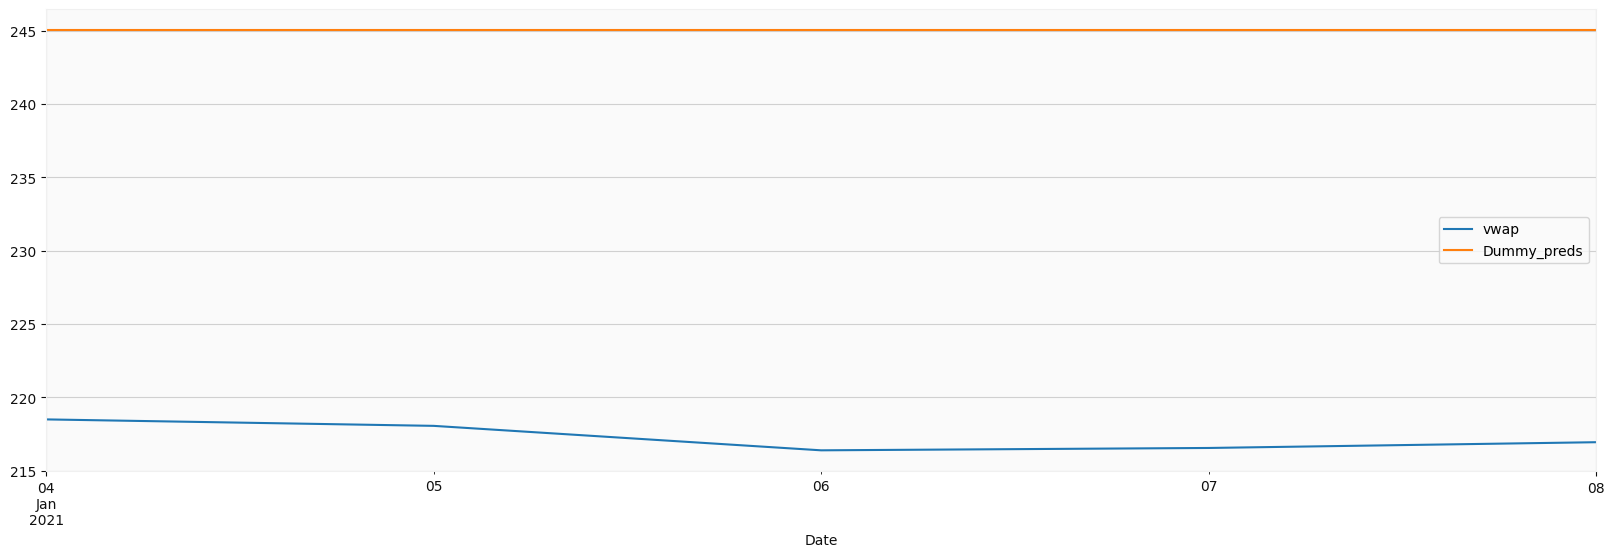

In [64]:
from sklearn.dummy import DummyRegressor

model = DummyRegressor().fit(df_train[exogenous_features_msft], df_train['vwap'])
df_valid['Dummy_preds'] = model.predict(df_valid[exogenous_features_msft])
print('RMSE:', np.sqrt(mean_squared_error(df_valid['vwap'], df_valid['Dummy_preds'])))
print('MAE:', mean_absolute_error(df_valid['vwap'], df_valid['Dummy_preds']))
df_valid[['vwap', 'Dummy_preds']].plot()

Dummy Regressor for IBM

In [79]:

df_valid = data_ibm.loc[:"2021-01-10"]
df_train = data_ibm.loc["2021-01-10":]

In [80]:
df_valid

,Date,Open,High,Low,Close,Adj Close,Volume,Company,vwap,Open_mean_lag3,...,Volume_mean_lag3,Volume_mean_lag7,Volume_mean_lag30,Volume_std_lag3,Volume_std_lag7,Volume_std_lag30,month,week,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,2021-01-04,120.315491,120.382408,117.629066,118.489487,104.750336,5417443,1,118.833654,128.823776,...,5590261.0,5607762.0,5682390.5,1604039.375,2134952.75,3035071.50,1,1,4,0
2021-01-05,2021-01-05,119.512428,121.108986,119.130020,120.592735,106.609711,6395872,1,119.615233,120.315491,...,5417443.0,5417443.0,5417443.0,1604039.375,2134952.75,3035071.50,1,1,5,1
2021-01-06,2021-01-06,121.319313,126.080307,121.147224,123.604210,109.271996,8322708,1,121.266607,119.913956,...,5906657.5,5906657.5,5906657.5,691853.750,691853.75,691853.75,1,1,6,2
2021-01-07,2021-01-07,124.321220,124.722755,122.619499,123.317398,109.018440,4714740,1,121.700428,120.382408,...,6712007.5,6712007.5,6712007.5,1478207.500,1478207.50,1478207.50,1,1,7,3
2021-01-08,2021-01-08,122.915871,123.632889,121.395790,122.877632,108.629654,4891305,1,121.854197,121.717651,...,6477773.5,6212691.0,6212691.0,1805377.875,1566525.25,1566525.25,1,1,8,4


In [67]:
df_train

,Date,Open,High,Low,Close,Adj Close,Volume,Company,vwap,Open_mean_lag3,...,Volume_mean_lag3,Volume_mean_lag7,Volume_mean_lag30,Volume_std_lag3,Volume_std_lag7,Volume_std_lag30,month,week,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-11,2021-01-11,122.323135,123.977058,122.045891,122.925430,108.671928,5859587,IBM,122.039950,122.852135,...,5976251.00,5948413.50,5948413.5,2.034008e+06,1479767.875,1479767.875,1,2,11,0
2021-01-12,2021-01-12,123.413002,124.139580,122.313576,123.527725,109.204384,3921663,IBM,122.167652,123.186745,...,5155210.50,5933609.00,5933609.0,6.163630e+05,1324041.250,1324041.250,1,2,12,1
2021-01-13,2021-01-13,123.470360,124.043976,120.898659,121.338432,107.268944,8030874,IBM,122.155161,122.884003,...,4890851.50,5646188.50,5646188.5,9.689621e+05,1427998.500,1427998.500,1,2,13,2
2021-01-14,2021-01-14,122.390060,124.435944,121.940727,123.298279,109.001541,7848347,IBM,122.306713,123.068832,...,5937374.50,6019535.50,5944274.0,2.055710e+06,1677983.125,1568027.125,1,2,14,3
2021-01-15,2021-01-15,122.638626,123.556404,122.055450,122.743790,108.511353,5131153,IBM,122.347273,123.091141,...,6600294.50,6227032.00,6155837.5,2.321558e+06,1816374.625,1598187.500,1,2,15,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,2021-12-23,130.000000,130.960007,129.520004,130.630005,121.293480,3649000,IBM,127.207216,127.480003,...,4573533.50,6012314.50,5616480.0,5.648216e+05,2185460.500,1626192.750,12,51,23,3
2021-12-27,2021-12-27,130.630005,131.649994,129.949997,131.619995,122.212723,4293900,IBM,127.219174,128.906662,...,4142733.25,5717014.50,5529103.5,6.327388e+05,2364477.500,1659923.625,12,52,27,0
2021-12-28,2021-12-28,131.600006,133.220001,131.589996,132.630005,123.150536,3445200,IBM,127.232197,129.896667,...,3955366.75,5617571.50,5517456.5,3.236511e+05,2414263.500,1667561.250,12,52,28,1


RMSE: 3.9756877467240357
MAE: 3.787532076806997


C:\Users\ACER\AppData\Local\Temp\ipykernel_17396\2097043300.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['Dummy_preds'] = model.predict(df_valid[exogenous_features_ibm])


<Axes: xlabel='Date'>

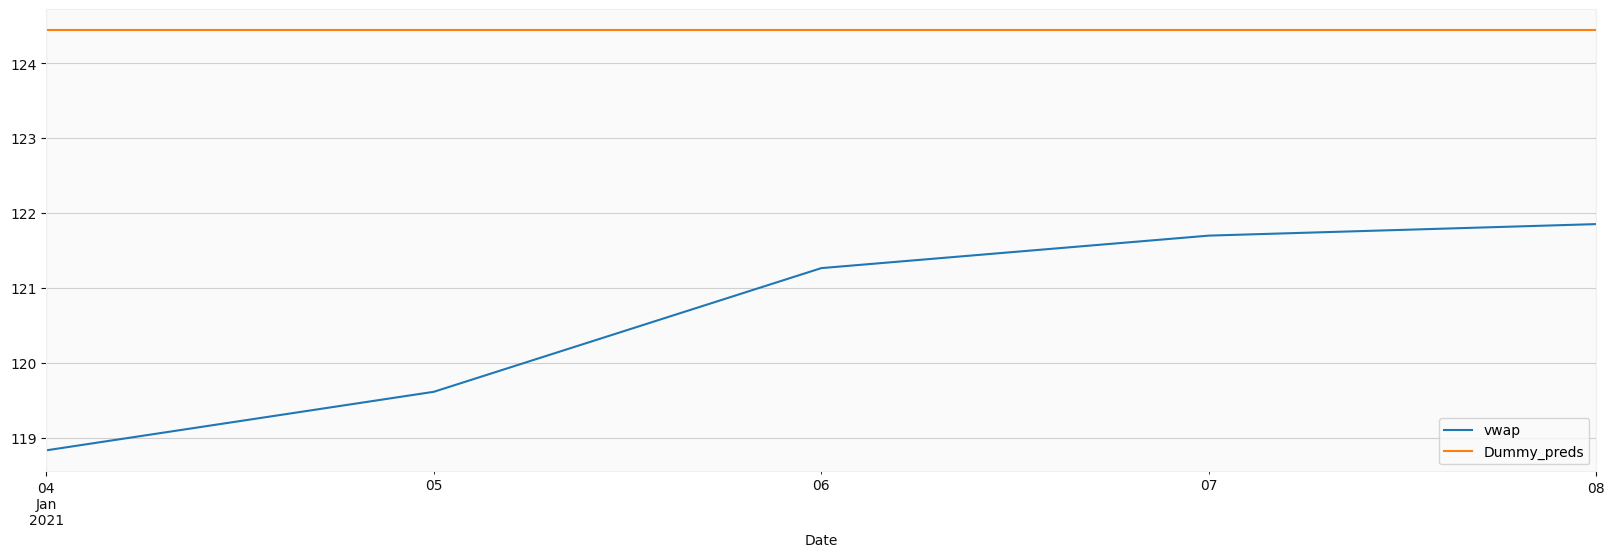

In [68]:
model = DummyRegressor().fit(df_train[exogenous_features_ibm], df_train['vwap'])
df_valid['Dummy_preds'] = model.predict(df_valid[exogenous_features_ibm])
print('RMSE:', np.sqrt(mean_squared_error(df_valid['vwap'], df_valid['Dummy_preds'])))
print('MAE:', mean_absolute_error(df_valid['vwap'], df_valid['Dummy_preds']))
df_valid[['vwap', 'Dummy_preds']].plot()

In [69]:
!pip install lightgbm

     ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
     --------- ------------------------------ 0.2/1.0 MB 7.0 MB/s eta 0:00:01
     ------------------------------ --------- 0.8/1.0 MB 9.7 MB/s eta 0:00:01
     ---------------------------------------- 1.0/1.0 MB 9.2 MB/s eta 0:00:00


Index(['vwap', 'Open_mean_lag3', 'Open_mean_lag7', 'Open_mean_lag30',
       'Open_std_lag3', 'Open_std_lag7', 'Open_std_lag30', 'High_mean_lag3',
       'High_mean_lag7', 'High_mean_lag30', 'High_std_lag3', 'High_std_lag7',
       'High_std_lag30', 'Low_mean_lag3', 'Low_mean_lag7', 'Low_mean_lag30',
       'Low_std_lag3', 'Low_std_lag7', 'Low_std_lag30', 'Close_mean_lag3',
       'Close_mean_lag7', 'Close_mean_lag30', 'Close_std_lag3',
       'Close_std_lag7', 'Close_std_lag30', 'vwap_mean_lag3', 'vwap_mean_lag7',
       'vwap_mean_lag30', 'vwap_std_lag3', 'vwap_std_lag7', 'vwap_std_lag30',
       'Volume_mean_lag3', 'Volume_mean_lag7', 'Volume_mean_lag30',
       'Volume_std_lag3', 'Volume_std_lag7', 'Volume_std_lag30', 'month',
       'week', 'day', 'day_of_week'],
      dtype='object')

RMSE: 0.398950401130578
MAE: 0.35852962608552447


C:\Users\ACER\AppData\Local\Temp\ipykernel_17396\1115270100.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['LGBM_preds'] = model.predict(df_valid[exogenous_features_ibm])


<Axes: xlabel='Date'>

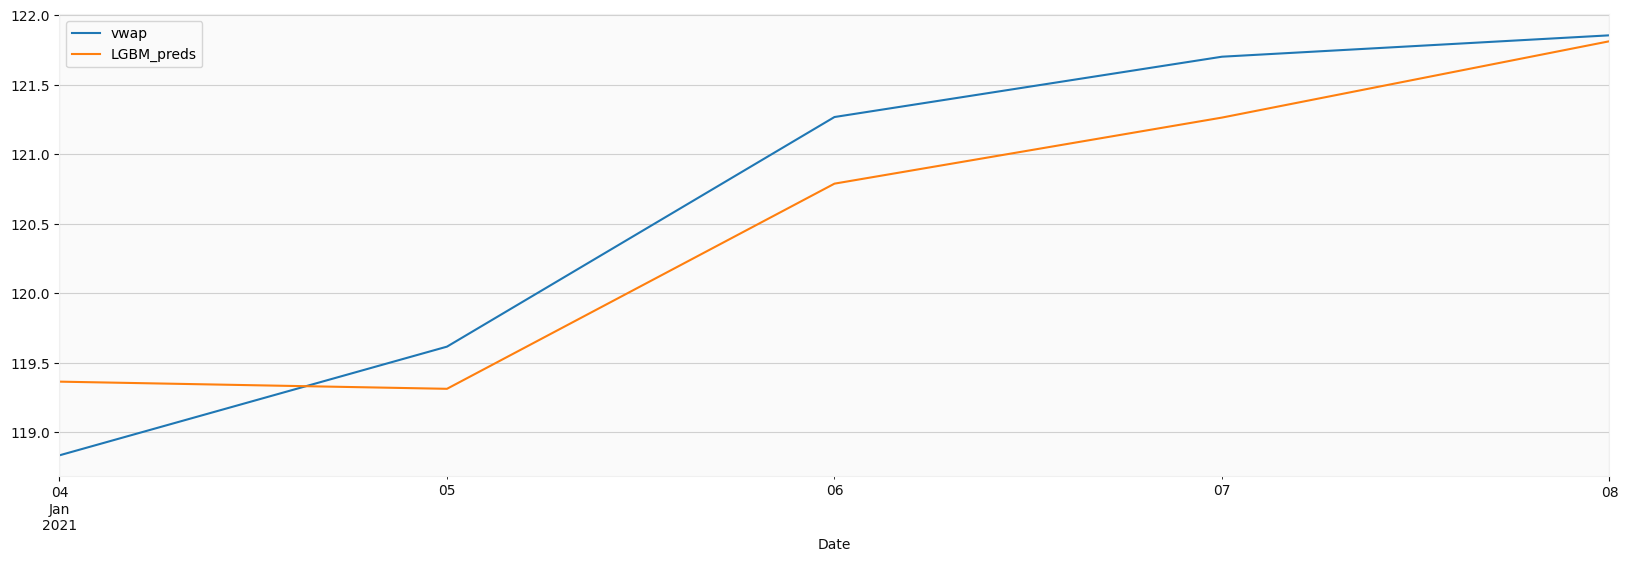

In [81]:
from lightgbm import LGBMRegressor

model = LGBMRegressor().fit(df_train[exogenous_features_ibm], df_train['vwap'])
df_valid['LGBM_preds'] = model.predict(df_valid[exogenous_features_ibm])
print('RMSE:', np.sqrt(mean_squared_error(df_valid['vwap'], df_valid['LGBM_preds'])))
print('MAE:', mean_absolute_error(df_valid['vwap'], df_valid['LGBM_preds']))
df_valid[['vwap', 'LGBM_preds']].plot()